<h2>Подключаем библиотеки</h2>


In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

<h2>EDA и ресерч-анализ</h2>

Значение стобцов в dataset. Нашли в интернете


<p>track_id: Spotify ID для трека</p>
<p>artists: Имена артистов, исполняющих трек. Если артистов несколько, они разделяются знаком ;</p>
<p>album_name: Название альбома, в котором появляется трек</p>
<p>track_name: Название трека</p>
<p>popularity: Популярность трека — это значение от 0 до 100, где 100 — это самый популярный. Популярность рассчитывается алгоритмом и в большинстве своём основана на общем количестве прослушиваний трека и на том, как недавно они происходили. Как правило, песни, которые сейчас часто слушают, имеют более высокую популярность, чем песни, которые много слушали в прошлом. Дубликаты треков (например, один и тот же трек из сингла и альбома) оцениваются независимо. Популярность исполнителей и альбомов математически выводится из популярности трека.</p>
<p>duration_ms: Длительность трека в миллисекундах</p>
<p>explicit: Является ли текст трека откровенным (true = да; false = нет или неизвестно)</p>
<p>danceability: Danceability описывает, насколько трек подходит для танцев, основываясь на сочетании музыкальных элементов, включая темп, стабильность ритма, силу удара и общую регулярность. Значение 0.0 обозначает наименьшую танцабельность, а 1.0 — наибольшую.</p>
<p>energy: Энергия — это мера от 0.0 до 1.0 и представляет собой воспринимаемую меру интенсивности и активности. Обычно энергичные треки звучат быстро, громко и шумно. Например, дэт-метал имеет высокую энергетику, в то время как прелюдии Баха оцениваются низко по этой шкале.</p>
<p>key: Ключ, в котором находится трек. Целые числа соответствуют нотам, используя стандартную нотацию Pitch Class. Пример: 0 = C, 1 = C♯/D♭, 2 = D и т.д. Если ключ не был определен, значение равно -1.</p>
<p>loudness: Общая громкость трека в децибелах (dB)</p>
<p>mode: Режим показывает модальность (мажор или минор) трека, тип шкалы, из которой взято его мелодическое содержание. Мажор обозначается 1, а минор — 0.</p>
<p>speechiness: Speechiness определяет наличие произнесённых слов в треке. Чем более «речевым» является запись (например, ток-шоу, аудиокнига, поэзия), тем ближе значение атрибута к 1.0. Значения выше 0.66 описывают треки, которые, вероятно, состоят полностью из произнесённых слов. Значения между 0.33 и 0.66 описывают треки, которые могут содержать как музыку, так и речь, как в секциях, так и в слоях, включая такие случаи, как рэп. Значения ниже 0.33 скорее всего представляют музыку и другие не речевые треки.</p>
<p>acousticness: Мера уверенности от 0.0 до 1.0 в том, что трек является акустическим. 1.0 представляет собой высокую уверенность в том, что трек акустический.</p>
<p>instrumentalness: Прогнозирует, содержит ли трек вокал. Звуки "Ooh" и "aah" рассматриваются как инструментальные в этом контексте. Рэп или треки с произносимыми словами явно являются "вокальными". Чем ближе значение инструментальности к 1.0, тем выше вероятность того, что трек не содержит вокального содержимого.</p>
<p>liveness: Определяет наличие аудитории в записи. Более высокие значения живости представляют увеличенную вероятность того, что трек был исполнен вживую. Значение выше 0.8 дает сильную вероятность того, что трек является живым.</p>
<p>valence: Мера от 0.0 до 1.0, описывающая музыкальную позитивность, передаваемую треком. Треки с высокой валентностью звучат более позитивно (например, счастливо, весело, эйфорично), в то время как треки с низкой валентностью звучат более негативно (например, грустно, подавленно, сердито).</p>

<p>tempo: Общий оцениваемый темп трека в ударах в минуту (BPM). В музыкальной терминологии темп — это скорость или ритм данного произведения и напрямую вытекает из средней продолжительности удара.</p>
<p>time_signature: Оценка размера. Размер (метр) — это нотационная конвенция, чтобы указать, сколько ударов в каждом такте (или меры). Размер варьируется от 3 до 7, указывая размеры 3/4 до 7/4.</p>
<p>track_genre: Жанр, к которому принадлежит трек</p>


In [28]:
data = pd.read_csv("dataset.csv")

In [29]:
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [31]:
data.columns


Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [32]:
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [33]:
data = data.dropna()

In [34]:
data.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113999.000000,113999.000000,1.139990e+05,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,56999.421925,33.238827,2.280312e+05,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034
std,32909.243463,22.304959,1.072961e+05,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623
min,0.000000,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.500000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000
50%,56999.000000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.500000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [35]:
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

<h3>1 график


<h3>Как длительность песни влияет на её популярность и восприятие аудитории, с учётом жанровых особенностей и тенденций?</h3>

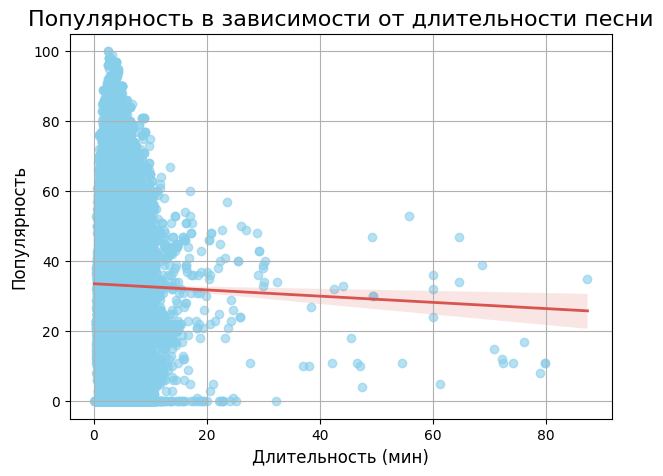

In [36]:
# Создание нового столбца с длительностью в минутах
data['duration_min'] = data['duration_ms'] / 60000

# Установка размера графика
plt.figure(figsize=(7, 5))  

# Построение регрессионного графика
# - data=data: указывает, из какого DataFrame мы берем данные.
# - x='duration_min': задает длительность песен (в минутах) по оси X.
# - y='popularity': задает популярность песен по оси Y.
# scatter_kws настраивает параметры точек рассеяния:
# - "alpha": задает уровень прозрачности точек, значение 0.6 делает их полуподдерживающими.
# - "color": задает цвет точек, в данном случае спокойный небесно-голубой (#87CEEB).
# line_kws настраивает параметры линии регрессии:
# - "color": задает цвет линии, здесь используем яркий красный (#d9534f).
# - "linewidth": задает ширину линии регрессии, значение 2.
sns.regplot(data=data, x='duration_min', y='popularity', 
            scatter_kws={"alpha": 0.6, "color": "#87CEEB"}, 
            line_kws={"color": "#d9534f", "linewidth": 2}) 

# Настройка заголовка и меток осей
plt.title('Популярность в зависимости от длительности песни', fontsize=16)

# Установка меток для осей
plt.xlabel('Длительность (мин)', fontsize=12)
plt.ylabel('Популярность', fontsize=12)

# Добавление сетки на график
plt.grid(True)  

# Отображение графика
plt.show()

Вывод: 1. Длительность треков:
   - Большинство треков находятся в диапазоне стандартной продолжительности для популярных музыкальных форматов (3-4 минуты). Это может соглашаться с общепринятой практикой записи коммерческой музыки.
   - Длинные треки (более 5 минут) занимают небольшую долю в выборке, что может говорить о тенденции к созданию более коротких и доступных к воспроизведению композиций для широкой аудитории.

2. Популярность треков:
   - Значительное стандартное отклонение в популярности указывает на большое разнообразие среди треков — от малоизвестных до настоящих хитов. 
   - Медиана и квартильное распределение показывают, что доля популярных треков ограничена, и большинство из них имеют средний уровень известности.

3. Связь между длительностью и популярностью:
   - Данный анализ не говорится напрямую о взаимосвязи между длительностью треков и их популярностью, но можно предположить, что треки, укладывающиеся в 3-4 минуты, зачастую имеют лучшую вероятность привлечь внимание слушателей и получить высокую популярность на стриминговых платформах.


<h3>2 график

Ожидание увидеть основной пик на графике, который представляет наиболее частую длительность песни, позволяет сделать множество выводов о предпочтениях слушателей и текущее состояние музыкальной индустрии. 

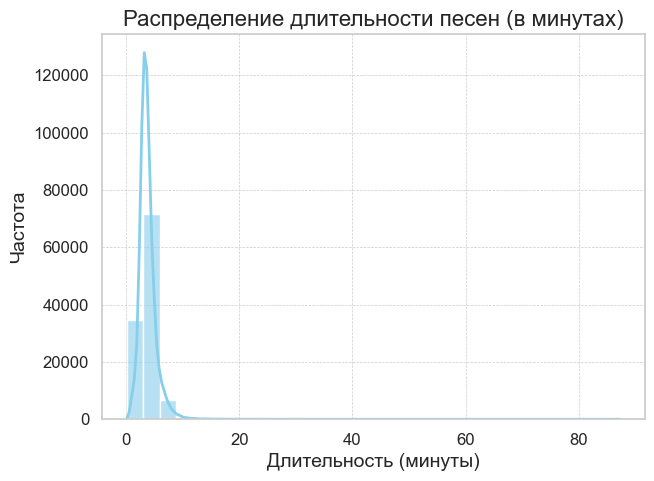

count    113999.000000
mean          3.800519
std           1.788268
min           0.143100
25%           2.901100
50%           3.548433
75%           4.358433
max          87.288250
Name: duration_ms, dtype: float64
Медиана длительности: 3.55 минуты


In [71]:
# Выберите стиль графика
sns.set_theme(style="whitegrid")

# Установка размера графика
plt.figure(figsize=(7, 5))

# Построение гистограммы для отображения распределения длительности песен (в минутах)
# 'data['duration_ms'] / 60000' переводит длительность из миллисекунд в минуты.
# bins=30 задает количество интервалов (бинов) на гистограмме, что управляет детализацией распределения.
# kde=True добавляет линию плотности, показывая непрерывное распределение данных.
# color="skyblue" задает цвет для заполненной области гистограммы.
# line_kws={} используется для настройки параметров линии KDE: 'color': 'red' задает цвет линии, 
# 'lw': 2 — ширину линии.
# alpha=0.6 задает прозрачность области гистограммы, чтобы лучше видеть пересечения.
sns.histplot(data['duration_ms'] / 60000, bins=30, kde=True, color="skyblue", 
             line_kws={'color': 'red', 'lw': 2}, alpha=0.6)  

# Настройка заголовка и меток
plt.title('Распределение длительности песен (в минутах)', fontsize=16) 
plt.xlabel('Длительность (минуты)', fontsize=14)  
plt.ylabel('Частота', fontsize=14)  

# Добавление сетки
plt.grid(True, linestyle='--', linewidth=0.5)

# Увеличение шрифта для меток осей
plt.tick_params(axis='both', which='major', labelsize=12)

# Показать график
plt.show()

# Вывод статистики длительности песен в текстовом виде
duration_stats = data['duration_ms'] / 60000 

# Используем describe() для получения основных статистических показателей
statistics = duration_stats.describe()

# Выводим статистику в консоль
print(statistics)

# Рассчитываем медиану длительности песен.
median_duration = duration_stats.median()

# Метод mode() может возвращать несколько значений, поэтому выбираем первое с помощью [0].
mode_duration = duration_stats.mode()[0]  

# Выводим медиану в консоль с форматированием до двух знаков после запятой.
print(f"Медиана длительности: {median_duration:.2f} минуты")




Вывод: 
- Длительность песен в наборе данных различается от очень коротких до очень длинных, что позволяет предположить влиятельные жанры и тенденции в музыкальной индустрии. Наблюдается высокая вариативность длительности, что может быть связано с различными стилями и форматами представления музыки.

- Тенденции в данных указывают на то, что большинство треков сосредоточены в диапазоне от 2.90 до 4.36 минут, что согласуется с общепринятыми стандартами для поп-музыки и других популярных жанров.

<h3>Жанры</h3>

In [72]:
data.track_genre.value_counts()

track_genre
acoustic             1000
afrobeat             1000
psych-rock           1000
progressive-house    1000
power-pop            1000
                     ... 
emo                  1000
electronic           1000
electro              1000
world-music          1000
k-pop                 999
Name: count, Length: 114, dtype: int64

Можем заметить что каждого жанра 1000, значит изначально при составлении датасета просто взяли каждый жанр и в нем по 1000 треков

<h3>3 график

Построим график популярности в зависимости от жанра.
Ожидаю увидеть результаты анализа, которые покажут, какие жанры музыки обладают наиболее высокой средней популярностью. Это может предоставить нам ценную информацию о текущих музыкальных предпочтениях и трендах, а также помочь лучше понять, какие стили музыки наиболее привлекательны для слушателей.

C:\Users\Capybara-PC\AppData\Local\Temp\ipykernel_3064\4148529189.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_popularity, x='track_genre', y='popularity', palette='viridis')


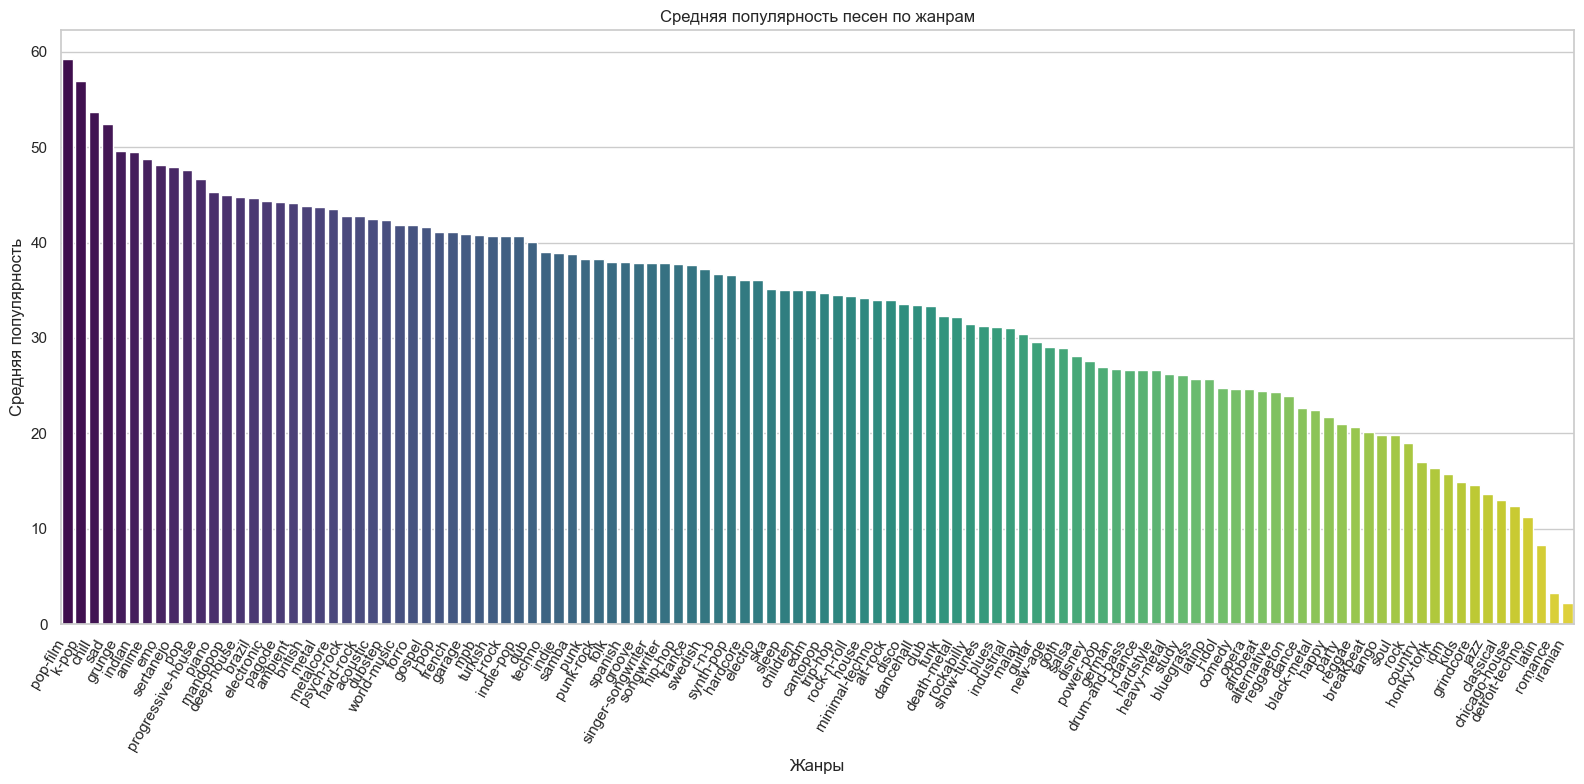

In [73]:
"""Старый график"""

# # Средняя популярность по жанрам
# # Группируем данные по жанрам (track_genre) и вычисляем среднюю популярность для каждого жанра
# genre_popularity = data.groupby('track_genre')['popularity'].mean().reset_index()

# # Сортировка по популярности
# # Сортируем результирующий датафрейм по столбцу 'popularity' в порядке убывания
# genre_popularity = genre_popularity.sort_values(by='popularity', ascending=False)

# # Установка размера графика
# plt.figure(figsize=(12, 6))

# # Создание столбчатой диаграммы для визуализации средней популярности по жанрам
# # Используется 'sns.barplot' для отображения данных
# # 'palette' задает цветовую палитру для графика
# sns.barplot(data=genre_popularity, x='track_genre', y='popularity', palette='viridis')

# plt.title('Средняя популярность песен по жанрам')
# plt.xticks(rotation=45)
# plt.ylabel('Средняя популярность')
# plt.show()


"""Исправленный график"""

# Средняя популярность по жанрам
genre_popularity = data.groupby('track_genre')['popularity'].mean().reset_index()

# Сортировка по популярности
genre_popularity = genre_popularity.sort_values(by='popularity', ascending=False)

# Установка размера графика
plt.figure(figsize=(16, 8))

# Создание столбчатой диаграммы
sns.barplot(data=genre_popularity, x='track_genre', y='popularity', palette='viridis')

# Настройка заголовка и меток осей
plt.title('Средняя популярность песен по жанрам')
plt.xticks(rotation=60, ha='right')  # Угол текста и выравнивание
plt.ylabel('Средняя популярность')
plt.xlabel('Жанры')

plt.tight_layout()  # Оптимизирует отступы для читаемости
plt.show()



Так как все накладывается друг на друга, сделаю выборку топ 10 самых популярных жанров


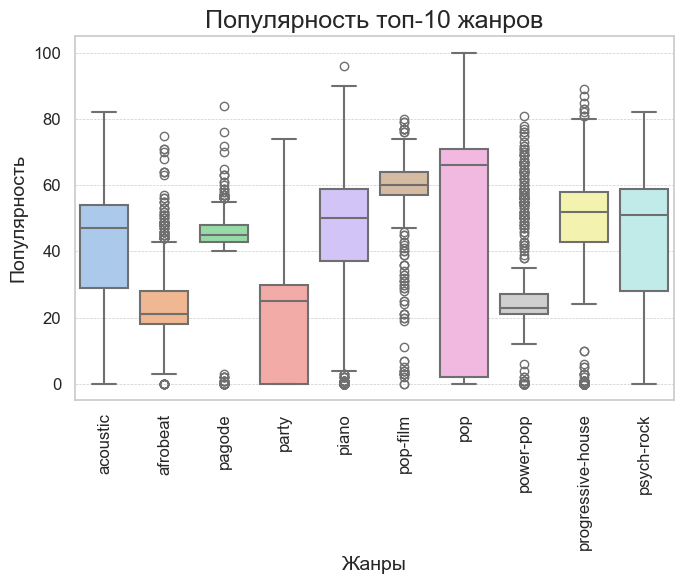

In [74]:
# Используем value_counts() для подсчета количества треков в каждом жанре
# Метод value_counts() создает частотную таблицу, подсчитывая количество треков 
# для каждого уникального значения в столбце 'track_genre'.
top_genres = data['track_genre'].value_counts().head(10).index

# Фильтруем данные, оставляя только треки из топ-10 жанров
filtered_data = data[data['track_genre'].isin(top_genres)]

# Устанавливаем стиль графика
sns.set_theme(style="whitegrid")

# Устанавливаем размер графика
plt.figure(figsize=(7, 6))

# Создание боксплота для отображения популярности по жанрам
# Функция sns.boxplot() создает боксплот, чтобы показать распределение значений популярности для каждого жанра.
# Параметры:
# - data=filtered_data: использует отфильтрованные данные.
# - x='track_genre': определяет, что по оси X будут отображаться жанры.
# - y='popularity': определяет, что по оси Y будут отображаться значения популярности.
# - hue='track_genre': позволяет визуализировать данные по некоторым категориям на той же оси
# - palette="pastel": устанавливает палитру цветов "пастель" для визуально приятного восприятия.
# - linewidth=1.5: задает ширину линий, что делает боксплот более четким.
# - legend=False: отключает отображение легенды, так как она избыточна при использовании hue с 'track_genre'.
sns.boxplot(data=filtered_data, x='track_genre', y='popularity', 
            hue='track_genre', palette="pastel", linewidth=1.5, legend=False)

# Настройка заголовка и меток
plt.title('Популярность топ-10 жанров', fontsize=18)  
plt.xlabel('Жанры', fontsize=14) 
plt.ylabel('Популярность', fontsize=14) 

# Увеличиваем шрифт для меток по оси X и выставляем текст вертикально
plt.xticks(rotation=90, fontsize=12)

# Добавление сетки для улучшения восприятия
# plt.grid() добавляет сетку на график, а axis='y', linestyle='--', linewidth=0.5 позволяет настроить 
# линию сетки по оси Y.
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# Увеличиваем шрифт для меток оси Y
plt.tick_params(axis='y', labelsize=12)

# Показать график
plt.tight_layout() 
plt.show()  




Вывод: В целом, исследуемые данные показывают, что жанры поп и поп-фильм выделяются наибольшей популярностью, в то время как акустическая музыка, пиано и прогрессивный хаус также имеют заметный интерес. В то же время, опера и партия остаются менее популярными, что создает возможности для стратегии маркетинга и продвижения менее коммерчески успешных жанров.

<h3>4 график

Это может предоставить ценное понимание взаимосвязи между двумя характеристиками, позволяя глубже проанализировать, как они влияют друг на друга. Корреляция между ними может раскрыть интересные закономерности и зависимости, которые в свою очередь могут помочь в формировании более обоснованных выводов и предположений. 

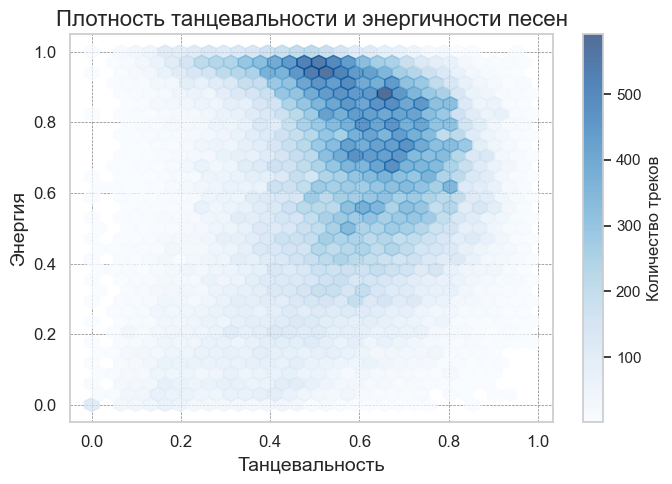

In [75]:
# Установка стиля графика с помощью Seaborn
sns.set_theme(style="whitegrid")

# Установка размера графика
plt.figure(figsize=(7, 5))

# Создание графика hexbin
# Функция plt.hexbin() используется для создания графика с использованием десятиугольных ячеек (hexagonal bins).
# 'data['danceability']' и 'data['energy']' — координаты по осям X и Y, соответственно.
# 'gridsize=30' управляет размером ячеек; чем меньше значение, тем больше ячеек будет видно.
# 'cmap='Blues'' задает цветовую палитру для заполнения ячеек.
# 'mincnt=1' указывает минимальное количество треков в ячейке для отображения 
# 'alpha=0.7' управляет прозрачностью ячеек, позволяя видеть наложение.
plt.hexbin(data['danceability'], data['energy'], gridsize=30, cmap='Blues', mincnt=1, alpha=0.7)

# Создание цветовой шкалы для графика
# Аргумент label задает подпись для цветовой шкалы, которая указывает, что она отражает количество треков.
cb = plt.colorbar(label='Количество треков')

# Настройка заголовка и меток
plt.title('Плотность танцевальности и энергичности песен', fontsize=16)
plt.xlabel('Танцевальность', fontsize=14)
plt.ylabel('Энергия', fontsize=14)

# Настройка шрифтов и сетки для улучшения читаемости
# plt.xticks() и plt.yticks() изменяют размер шрифтов для меток по осям, чтобы они были более читаемыми.
# plt.grid() добавляет сетку на график с заданным цветом и стилем; это помогает ориентироваться в значениях.
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Отображение графика
plt.tight_layout()  
plt.show()



Вывод: На основе полученных данных и графического представления можно сделать несколько выводов:

1. Корреляция между танцевальностью и энергией: График показывает, как танцевальность и энергия соотносятся друг с другом. Области высокой плотности могут указывать на то, что треки с высокой танцевальностью, как правило, также обладают высокой энергией, что подтверждает популярные музыкальные условия для клубов и вечерников.

2. Разнообразие треков: Важно отметить, что существуют треки с низкой танцевальностью, но высокой энергией, что может говорить о наличии композиций, подходящих для энергичного прослушивания, но не обязательно для танцевальных мероприятий.

3. Стратегия создания треков: Результаты анализа могут дать инсайты композиторам и продюсерам о том, какие характеристики следует использовать при создании музичных треков для достижения определенной целевой аудитории, что может помочь в разработке успешных музыкальных произведений.

Таким образом, анализ танцевальности и энергии позволяет глубже понять структуру музыкальных треков и помогает выявить закономерности, которые могут быть полезными как для слушателей, так и для создателей музыки.

<h3>5 график

Может помочь определить, какие альбомы наиболее успешно воспринимаются аудиторией.

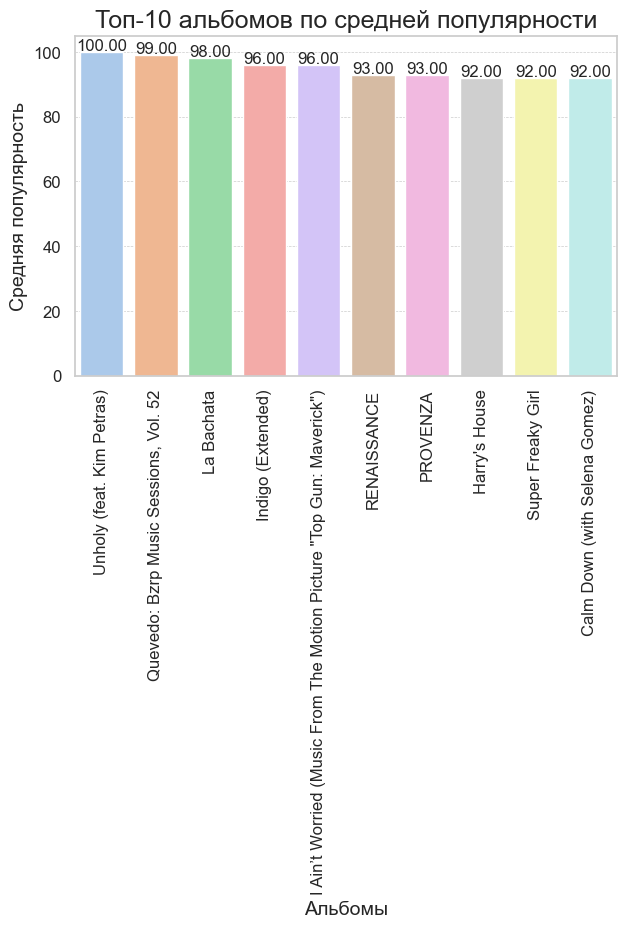

In [76]:
# Группировка данных по альбомам и вычисление средней популярности
# вызывается метод mean(), чтобы рассчитать среднюю популярность для каждого альбома.
# reset_index() преобразует результат обратно в DataFrame, сбрасывая индекс.
album_popularity = data.groupby('album_name')['popularity'].mean().reset_index()

# Установка стиля графика с помощью Seaborn
sns.set_theme(style="whitegrid")  

# Установка размера графика
plt.figure(figsize=(7, 5))

# Создание столбчатой диаграммы 
# сортируем данные по столбцу 'popularity' в порядке убывания, используя sort_values().
top_albums = album_popularity.sort_values('popularity', ascending=False).head(10)

# sns.barplot() создает столбчатую диаграмму.
# Аргумент data указывает источник данных,
# x и y соответствуют именам столбцов из DataFrame для осей X и Y, соответственно.
# hue указывает, что цвет столбцов должен зависеть от название альбома (при помощи параметра dodge=False).
# palette='pastel' задает пастельные тона для столбцов, создавая приятный визуальный эффект.
sns.barplot(data=top_albums, x='album_name', y='popularity', hue='album_name', dodge=False, palette='pastel')

# Настройка заголовка и меток
plt.title('Топ-10 альбомов по средней популярности', fontsize=18)
plt.xlabel('Альбомы', fontsize=14)
plt.ylabel('Средняя популярность', fontsize=14)

# Поворот меток по оси X на 90 градусов для лучшей читаемости
plt.xticks(rotation=90, fontsize=12)

# Добавление сетки для лучшего восприятия
# Сетка по оси Y помогает легче ориентироваться в значениях и постоянно видеть градацию.
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# Увеличиваем шрифт для меток оси Y
plt.tick_params(axis='y', labelsize=12)

# Настройка отображения значений над столбцами
for index, value in enumerate(top_albums['popularity']):
    plt.text(index, value + 0.5, f"{value:.2f}", ha='center', fontsize=12)

# Настройка отступов, чтобы предотвратить перекрытие
plt.subplots_adjust(bottom=0.2) 

# Показать график
plt.show()


Вывод: Альбом "Unholy (feat. Kim Petras)" достигает максимальной популярности в 100.0, что указывает на его выдающийся успех и широкую известность среди аудитории. Другие альбомы с высокой популярностью также занимают верхние позиции, такие как "Quevedo: Bzrp Music Sessions, Vol. 52" с популярностью 99.0 и "La Bachata" с 98.0.


<h3>Корреляция

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [78]:
# Выбираем колонны с категориальными данными (тип 'object' и 'bool')
categorial_cols = data.select_dtypes(include=["object", "bool"]).columns

# Выбираем колонны с числовыми данными (типы 'int64' и 'float64')
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns


In [79]:
# Перебираем каждую категориальную колонну
for col in categorial_cols:
    # Создаем экземпляр LabelEncoder для кодирования категориальных данных
    le = LabelEncoder()
    
    # Применяем трансформацию и сохраняем закодированные значения обратно в колонну
    data[col] = le.fit_transform(data[col])


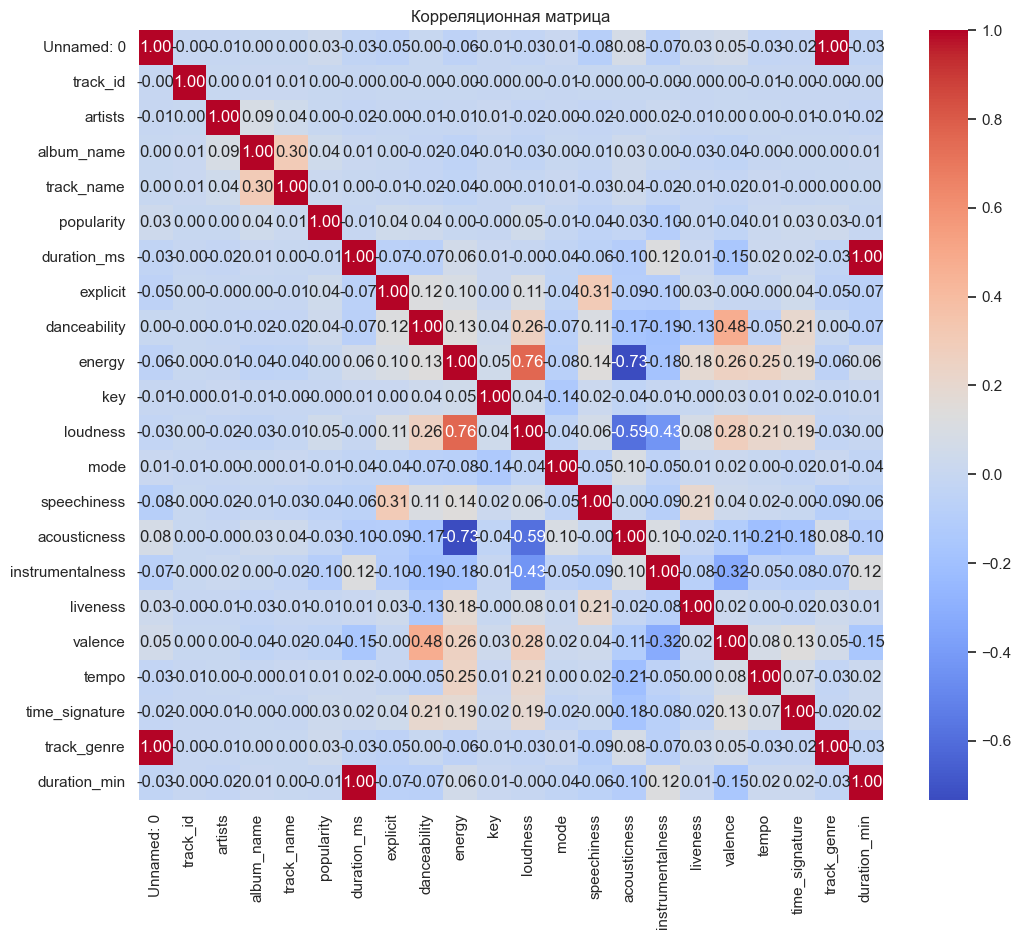

In [80]:
# Устанавливаем размер графика
plt.figure(figsize=(12, 10))

# Вычисляем корреляционную матрицу для числовых переменных
correlation_matrix = data.corr()

# Создаем тепловую карту для визуализации корреляционной матрицы
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')

# Устанавливаем заголовок для графика
plt.title('Корреляционная матрица')

# Отображаем график
plt.show()


Посмотреть корреляцию между различными числовыми характеристиками, что позволит выявить зависимости между ними.

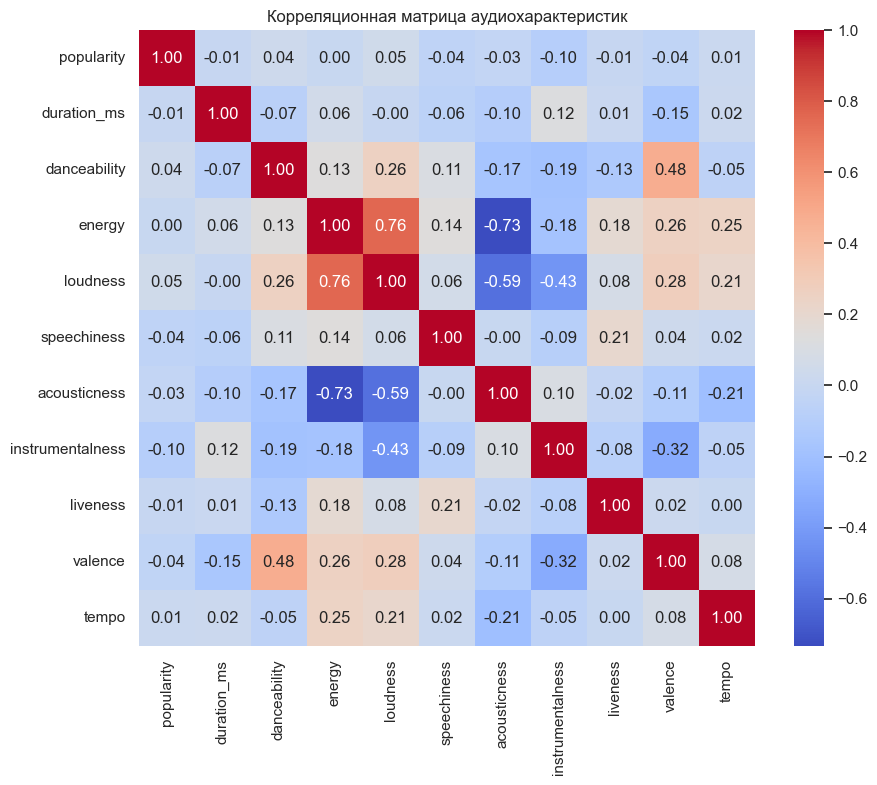

In [81]:
# Вычисляем корреляционную матрицу для выбранных столбцов, используя метод .corr()
correlation_matrix = data[['popularity', 'duration_ms', 'danceability', 
                            'energy', 'loudness', 'speechiness', 
                            'acousticness', 'instrumentalness', 
                            'liveness', 'valence', 'tempo']].corr()

# Построение тепловой карты для визуализации корреляционной матрицы
plt.figure(figsize=(10, 8))

# Создание тепловой карты с помощью seaborn
# 'annot=True' добавляет аннотации с коэффициентами корреляции на карту
# 'fmt='.2f'' задает формат отображения чисел
# 'cmap' устанавливает цветовую палитру, 'coolwarm' создаёт переход между холодными и тёплыми цветами
# 'square=True' делает ячейки квадратными
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)


plt.title('Корреляционная матрица аудиохарактеристик')
plt.show()




Вывод: Корреляционная матрица показывает, что популярность песен слабо коррелирует с основными аудиохарактеристиками. Это может означать, что факторы, влияющие на успех (популярность) песни, могут быть более сложными или зависят от контекста и внешних обстоятельств, нежели только от измеряемых аудиохарактеристик. 

1. Популярность и другие характеристики:
   - Популярность (popularity) имеет очень слабую корреляцию с большинством характеристик: все значения корреляции находятся в диапазоне от -0.10 до 0.05, что указывает на то, что ни одна из аудиохарактеристик не имеет значительного влияния на популярность песен. Это может сигнализировать о том, что популярность может зависеть от факторов, не связанных с этими характеристиками, например, маркетинга, социальных медиа или других трендов.

2. Длительность (duration_ms):
   - Корреляция между длительностью и популярностью составляет -0.01, что говорит о почти отсутствии зависимости. Длина песни, похоже, не влияет на её популярность.

3. Танцевальность (danceability):
   - Параметр danceability имеет положительную корреляцию с valence (0.48) и небольшую положительную корреляцию с энергией (0.13). Это может указывать на то, что более танцевальные треки зачастую имеют высокую положительную атмосферу. Однако с популярностью корреляция минимальна.

4. Энергия (energy) и громкость (loudness):
   - Энергия и громкость имеют положительную корреляцию (0.76), что означает, что более энергичные треки также имеют тенденцию быть более громкими.
   - Корреляция энергии с популярностью равна 0.00, что снова указывает на отсутствие значимых отношений.

5. Акустичность и инструментальность:
   - acousticness и instrumentalness имеют отрицательные корреляции со многими другими характеристиками, особенно с энергией (-0.73) и громкостью (-0.59). Это говорит о том, что акустические и инструментальные треки, как правило, менее энергичны и громки, но при этом интерес к этим жанрам может оставаться в своей аудитории.

6. Между характеристиками:
   - valence (настроение) имеет положительную корреляцию с danceability (0.48) и energy (0.26), что подтверждает, что более позитивные песни могут быть также более танцевальными и энергичными.

<h3>6 график

Ожидаю получить несколько ключевых визуальных представлений о распределении аудиохарактеристик

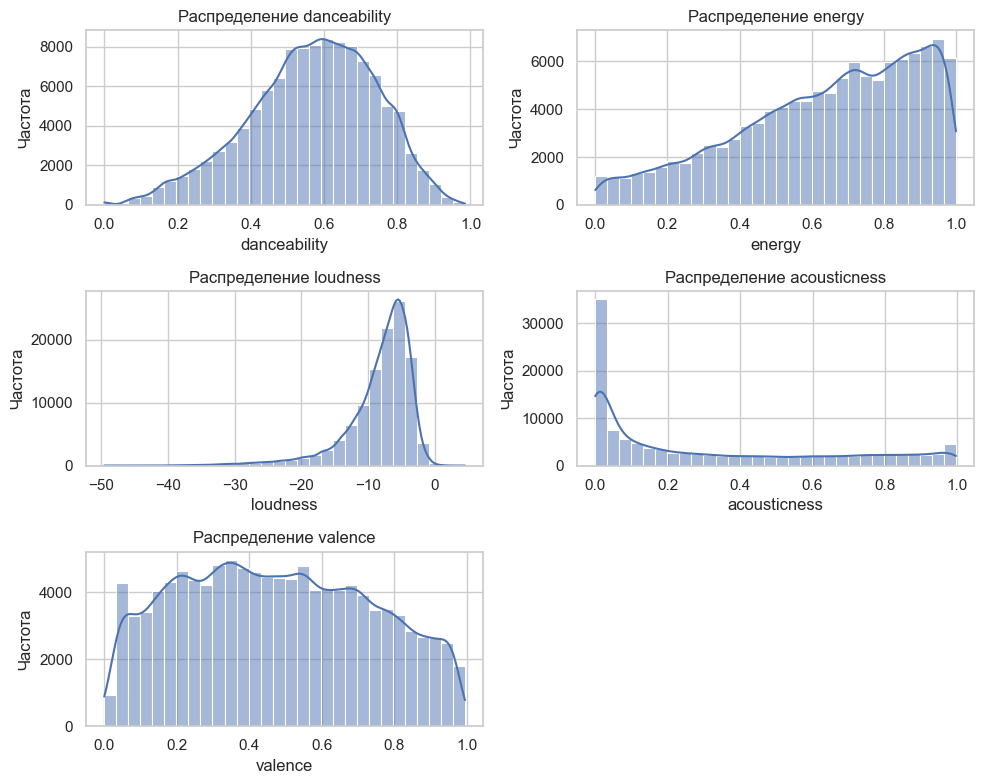

In [82]:
# Установка размера графика
plt.figure(figsize=(10, 8))

features = ['danceability', 'energy', 'loudness', 'acousticness', 'valence']

# Цикл для создания субграфиков для каждой характеристики
for i, feature in enumerate(features):
    # Создание подграфиков в сетке 3x2
    # 'i + 1' определяет текущее положение подграфика в сетке
    plt.subplot(3, 2, i + 1)
    
    # 'data[feature]' выбирает данные для текущей характеристики
    # 'bins=30' задаёт количество бинов для гистограммы
    # 'kde=True' включает отображение функции плотности вероятности
    sns.histplot(data[feature], bins=30, kde=True)

    plt.title(f'Распределение {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()


Вывод:  
1. Общая музыкальная характеристика:
   Анализ показывает, что выборка состоит преимущественно из музыкальных треков с умеренной танцевальностью (danceability) и высоким уровнем энергии (energy). Это может говорить о тенденции к более активным и динамичным композициям, популярным среди слушателей.

2. Разнообразие стилей:
   Высокое стандартное отклонение в категориях energy и acousticness показывает, что в выборке представлены треки с большим разнообразием стилей и настроений, что может привлечь широкую аудиторию с различными музыкальными предпочтениями.

3. Коммерческий потенциал:
   Умеренное значение danceability и высокие уровни energy могут указывать на хороший коммерческий потенциал таких треков для использования в клубах и на мероприятиях, что делает их привлекательными для продюсеров и исполнителей.

4. Эмоциональная окраска:
   Нейтральное среднее значение valence может сигнализировать о том, что хотя музыка может быть энергичной, она не всегда создает явно положительные эмоции, что открывает пространство для создания более позитивных и жизнерадостных композиций.

<h3>Выводы


Основные выводы из проведенного анализа можно обобщить следующим образом:

1. Длительность треков: 
   - Музыкальные композиции в рассматриваемом наборе данных сосредоточены в диапазоне от 2.90 до 4.36 минут, что соответствует общепринятым стандартам для популярных жанров, таких как поп и поп-фильм. При этом длительные треки (более 5 минут) встречаются реже, демонстрируя тенденцию к созданию более коротких, доступных и коммерчески успешных произведений.

2. Популярность: 
   - Значительное стандартное отклонение в уровне популярности указывает на разнообразие музыкальных треков — от менее известных до хитов. Несмотря на это, большая часть треков имеет средний уровень популярности, что требует отдельного внимания со стороны музыкантов и продюсеров в части стратегии продвижения их творчества.

3. Связь между длительностью и популярностью: 
   - Хотя прямая корреляция между длительностью треков и их популярностью не может быть определена, можно отметить, что композиции средней длины имеют больший потенциал для успеха на стриминговых платформах. Это подчеркивает важность формирования правильной длины треков для привлечения слушателей.

4. Музыкальные жанры: 
   - Популярность различных жанров варьируется, с явным преобладанием поп-музыки и некоторых смежных стилей, в то время как менее коммерческие жанры, такие как опера, могут оставаться незамеченными. Это создает возможности для целевых маркетинговых стратегий по продвижению менее известных жанров.

5. Танцевальность и энергия: 
   - Тенденция к высокой танцевальности и энергии коррелирует, что говорит о предпочтениях аудитории к динамичной музыке, подходящей для клубной атмосферы. Однако существует и меньшинство треков, обладающих высокой энергией, но низкой танцевальностью, что указывает на разнообразие музыкального контента.

6. Популярность конкретных альбомов: 
   - Альбомы с высоким уровнем популярности, такие как "Unholy (feat. Kim Petras)", демонстрируют успех, обусловленный не только характеристиками треков, но и внешними факторами, влияющими на восприятие слушателей. 

7. Сложность факторов популярности: 
   - Анализ также показывает, что популярность песен слабо коррелирует с их аудиохарактеристиками, что указывает на многофакторный характер успеха в музыкальной индустрии и необходимость учета дополнительных аспектов при оценке музыкальных произведений.


<h2>Feature Engineering</h2>

<h3>Подготовка данный, разбиение на категориальные и численные признаки</h3>

In [37]:
# Применяем функцию int к каждому элементу в колонке 'explicit'
data.explicit = data.explicit.apply(int)


Разобьем на категориальные и численные признаки

In [38]:
# Получаем список категориальных столбцов (объекты и категории) из DataFrame
cat_cols = data.select_dtypes(include=['object', 'category']).columns.to_list()

# Получаем список числовых столбцов из DataFrame
num_cols = data.select_dtypes(include=['number']).columns.to_list()

# Получаем количество уникальных значений для каждого числового столбца
num_cols_nunique = data[num_cols].nunique()

# Выводим количество уникальных значений для числовых столбцов
num_cols_nunique



Unnamed: 0          113999
popularity             101
duration_ms          50696
explicit                 2
danceability          1174
energy                2083
key                     12
loudness             19480
mode                     2
speechiness           1489
acousticness          5061
instrumentalness      5346
liveness              1722
valence               1790
tempo                45652
time_signature           5
duration_min         50696
dtype: int64

Как можно заметить select_dtypes разбил не все правильно, добавил в численные признаки, фичи которые по факту являются категориальнвыми. Скорей всего это связано с типом данных в dataset

In [39]:
# Добавляем категории 'explicit', 'key', 'mode' и 'time_signature' в список категориальных столбцов
cat_cols.extend(['explicit', 'key', 'mode', 'time_signature'])

# Удаляем категории 'explicit', 'key', 'mode' и 'time_signature' из списка числовых столбцов
for item in ['explicit', 'key', 'mode', 'time_signature']:
    num_cols.remove(item)

# Выводим обновлённый список категориальных столбцов
cat_cols


['track_id',
 'artists',
 'album_name',
 'track_name',
 'track_genre',
 'explicit',
 'key',
 'mode',
 'time_signature']

Проверим на отклонение числовые признаки

In [40]:
data[num_cols].skew().sort_values()

loudness            -2.006541
energy              -0.597005
danceability        -0.399505
Unnamed: 0           0.000007
popularity           0.046393
valence              0.115097
tempo                0.232308
acousticness         0.727321
instrumentalness     1.734392
liveness             2.105728
speechiness          4.647493
duration_min        11.195826
duration_ms         11.195826
dtype: float64

Видно что некоторые признаки скошены влево, а некоторые вправно, значит применим нормализацию данных. Сделаю это уже при создании модели.

<h3>Удаляем ненуженые данные, добавляем новые, преобразуем категориальные</h3>

Удаляем ненужные признаки, или которые плохо коррелируют с популярностью или же плохо распределеные

In [41]:
# Удаляем ненужные столбцы из DataFrame
data = data.drop([ 'track_id', 'Unnamed: 0', 
                  'duration_ms', 'track_name', 'artists', 'album_name', 'key'], axis=1)

# Создаём новый столбец 'dance_energy_rat' как отношение 'danceability' к 'energy', избегая деления на ноль
data['dance_energy_rat'] = data['danceability'] / (data['energy'] + 1e-6)

# Отображаем первые 5 строк обновлённого DataFrame
data.head()


,popularity,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,dance_energy_rat
0,73,0,0.676,0.4610,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,3.844433,1.466374
1,55,0,0.420,0.1660,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,2.493500,2.530105
2,57,0,0.438,0.3590,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,3.513767,1.220052
3,71,0,0.266,0.0596,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,3.365550,4.463012
4,82,0,0.618,0.4430,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,3.314217,1.395031


Посмотрим на кол-во уникальных значений в фичах и на этой основе определим какое применить кодирование

In [42]:
data.nunique()

popularity            101
explicit                2
danceability         1174
energy               2083
loudness            19480
mode                    2
speechiness          1489
acousticness         5061
instrumentalness     5346
liveness             1722
valence              1790
tempo               45652
time_signature          5
track_genre           114
duration_min        50696
dance_energy_rat    76245
dtype: int64

Для фичей у которых <= 5 уникальных значений применим ohe, а для track_genre у когорого 114, применим Target Encoding

In [43]:
#OHE
data = pd.get_dummies(data, columns=['mode', 'time_signature', 'explicit'], drop_first = True)

# Target Encoding
data['category_track_genre'] = data.groupby('track_genre')['popularity'].transform('mean')


Создаем признаки и таргет

In [44]:
# Получаем список всех столбцов в DataFrame и сохраняем его в переменной 'features'
features = data.columns.to_list()

# Удаляем столбец 'popularity' из списка признаков, так как он будет использоваться как целевая переменная
features.remove('popularity')
features.remove('track_genre')


# Определяем целевую переменную
target = 'popularity'



Создаем модель без и с кросс-валидицией

<h2>Эксперименты с моделями машинного обучения/глубокого обучения.</h2>

In [53]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score



<h3>Линейная регрессия без кросс-валидации

In [63]:
# Выбор признаков и целевой переменной
X = data[features]  # Признаки (независимые переменные)
y = data[target]    # Целевая переменная (зависимая переменная)

# Разделение данных на обучающую и тестовую выборки (80% - обучающая, 20% - тестовая)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание экземпляра StandardScaler для нормализации признаков
scaler = StandardScaler()

# Нормализация признаков: вычисляется среднее и стандартное отклонение на обучающей выборке
X_train_scaled = scaler.fit_transform(X_train)

# Применение нормализации к тестовой выборке на основе параметров обучающей выборки
X_test_scaled = scaler.transform(X_test)

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Предсказание целевой переменной на тестовой выборке
y_pred = model.predict(X_test_scaled)

# Оценка модели с использованием различных метрик
mse = mean_squared_error(y_test, y_pred)        # Среднеквадратичная ошибка
mae = mean_absolute_error(y_test, y_pred)       # Средняя абсолютная ошибка
rmse = np.sqrt(mse)                              # Корень из среднеквадратичной ошибки

# Вывод результатов оценки модели
print(f'Mean Squared Error: {mse}')  
print(f'Mean Absolute Error: {mae}')  
r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2}")


Mean Squared Error: 365.9135797495829
Mean Absolute Error: 14.082158280842624
R^2: 0.2624040635774567


Вес модели. Важность каждого из параметров.

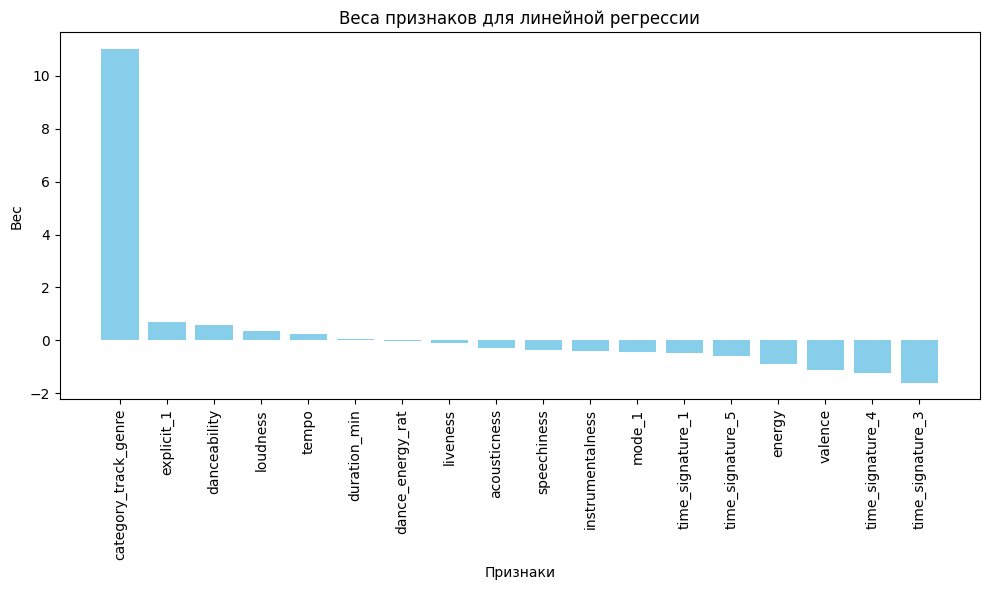

In [75]:
# Получение весов признаков из обученной модели
feature_weights = model.coef_  # Коэффициенты модели
feature_names = X.columns      # Названия признаков

# Сортировка признаков по абсолютному значению весов
sorted_index = np.argsort(feature_weights)[::-1]
sorted_weights = feature_weights[sorted_index]
sorted_feature_names = feature_names[sorted_index]

# Построение графика для всех признаков
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_weights)), sorted_weights, color='skyblue')
plt.xticks(range(len(sorted_weights)), sorted_feature_names, rotation=90)
plt.title('Веса признаков для линейной регрессии')
plt.xlabel("Признаки")
plt.ylabel("Вес")
plt.tight_layout()
plt.show()


<h3>ВЫВОД ПО ВЕСУ ПРИЗНАКА В ПРОЦЕССЕ ЛИНЕЙНОЙ РЕГРЕССИИ

При обучении модели мы видим, что преобладающими признаками являются "category_track_genre" и "explicit_1". Из этого можно сделать вывод, что жанр трека и наличие метки "explicit" оказывают наиболее значительное влияние на предсказания модели.

Остальные признаки, такие как "danceability", "loudness" и "tempo", также вносят свой вклад, но их вес существенно ниже. Это может свидетельствовать о том, что они играют вспомогательную роль в процессе предсказания.

Наименее значимые признаки, например "time_signature_3" и "time_signature_4", имеют отрицательные веса, что может указывать на их обратное влияние или минимальную значимость в данной модели. Это можно интерпретировать как то, что временные размеры треков в этих категориях менее релевантны для анализа.

Следовательно, при дальнейшем анализе данных и построении моделей стоит уделить основное внимание наиболее значимым признакам и, возможно, пересмотреть подход к менее значимым, чтобы исключить избыточность данных или добавить новые потенциально полезные признаки.

<h3>Линейная регрессия с кросс-валидацией</h3>

In [59]:
# Выбор признаков и целевой переменной
X = data[features]  # Признаки (независимые переменные)
y = data[target]    # Целевая переменная (зависимая переменная)

# Разделение данных на обучающую и тестовую выборки (80% - обучающая, 20% - тестовая)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание экземпляра StandardScaler для нормализации признаков
scaler = StandardScaler()

# Нормализация признаков: вычисляется среднее и стандартное отклонение на обучающей выборке
X_train_scaled = scaler.fit_transform(X_train)

# Применение нормализации к тестовой выборке
X_test_scaled = scaler.transform(X_test)

# Создание модели линейной регрессии
model = LinearRegression()

# Кросс-валидация с 5 фолдами для оценки метрик (MSE, MAE, R^2)
cv_mse = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mae = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_r2 = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')

# Преобразование отрицательных значений для MSE и MAE в положительные
cv_mse = -cv_mse
cv_mae = -cv_mae

# Вывод результатов кросс-валидации
print('Результаты кросс-валидации (5 фолдов):')
print(f'Mean Squared Error (MSE): {np.mean(cv_mse):.4f} ± {np.std(cv_mse):.4f}')  # Среднеквадратичная ошибка
print(f'Mean Absolute Error (MAE): {np.mean(cv_mae):.4f} ± {np.std(cv_mae):.4f}')  # Средняя абсолютная ошибка
print(f'R^2 Score: {np.mean(cv_r2):.4f} ± {np.std(cv_r2):.4f}')  # Коэффициент детерминации



Результаты кросс-валидации (5 фолдов):
Mean Squared Error (MSE): 369.5270 ± 3.3842
Mean Absolute Error (MAE): 14.1085 ± 0.0929
R^2 Score: 0.2577 ± 0.0038


ГРАФИК СРАВНЕНИЯ

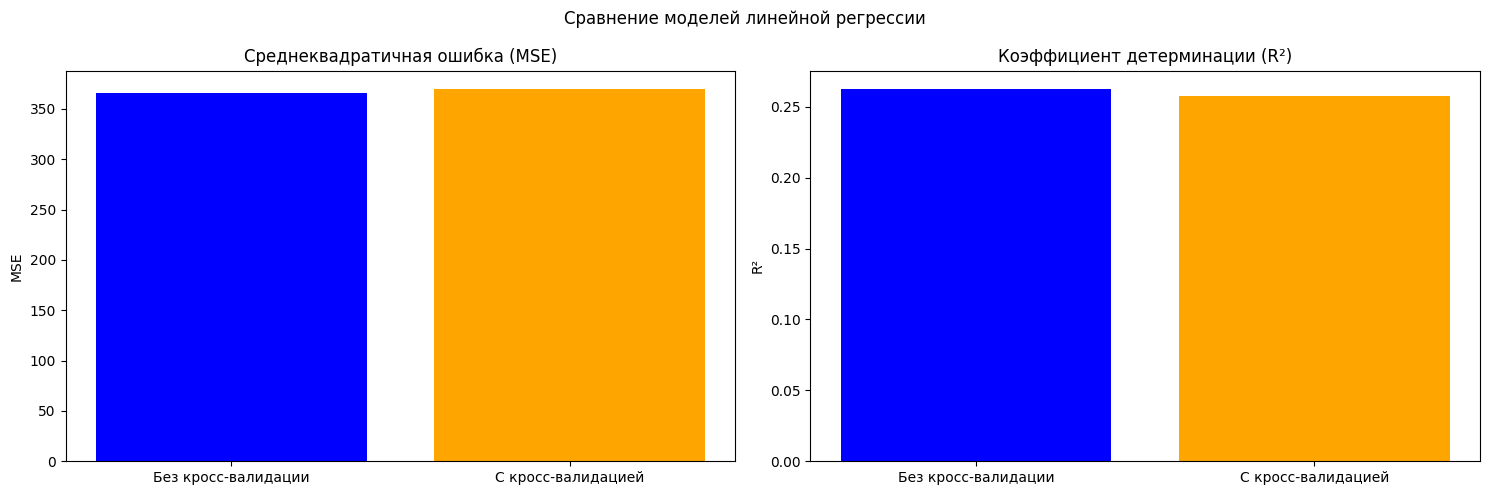

In [61]:
# Средние значения метрик для кросс-валидации
cv_mse_mean = np.mean(cv_mse)  # Среднее значение среднеквадратичной ошибки (MSE) из кросс-валидации
cv_r2_mean = np.mean(cv_r2)    # Среднее значение коэффициента детерминации (R²) из кросс-валидации

# Подготовка данных для графиков
metrics_simple = {'MSE': mse, 'R2': r2}  # Метрики без кросс-валидации
metrics_cv = {'MSE': cv_mse_mean, 'R2': cv_r2_mean}  # Метрики с кросс-валидацией

# Построение графиков
fig, ax = plt.subplots(1, 2, figsize=(15, 5))  # Создание полотна с 2 подграфиками

# График для MSE
ax[0].bar(['Без кросс-валидации', 'С кросс-валидацией'], 
          [metrics_simple['MSE'], metrics_cv['MSE']], color=['blue', 'orange'])  # Столбчатая диаграмма
ax[0].set_title('Среднеквадратичная ошибка (MSE)')  # Заголовок графика
ax[0].set_ylabel('MSE')  # Подпись оси Y

# График для R²
ax[1].bar(['Без кросс-валидации', 'С кросс-валидацией'], 
          [metrics_simple['R2'], metrics_cv['R2']], color=['blue', 'orange'])  # Столбчатая диаграмма
ax[1].set_title('Коэффициент детерминации (R²)')  # Заголовок графика
ax[1].set_ylabel('R²')  # Подпись оси Y

# Общий заголовок для всего полотна
plt.suptitle('Сравнение моделей линейной регрессии')  
plt.tight_layout()  # Автоматическая настройка отступов между графиками
plt.show()  # Отображение графиков



<H3>ВЫВОД ПО ЛИНЕЙНОЙ РЕГРЕССИИ</H3>

Количество ошибок увеличилось, что привело к снижению значения R² до допустимого уровня в контексте проведения анализа.

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.preprocessing import MinMaxScaler

<h3>Дерево без кросс-валидации</h3>

In [68]:
# Выбор признаков и целевой переменной
X = data[features]  # Признаки (независимые переменные)
y = data[target]    # Целевая переменная (зависимая переменная)

# Разделение данных на обучающую и тестовую выборки (80% - обучающая, 20% - тестовая)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация признаков с использованием MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Обучение и преобразование обучающей выборки
X_test_scaled = scaler.transform(X_test)        # Преобразование тестовой выборки

# Задаем параметры модели дерева решений 
tree_model = DecisionTreeRegressor(
    max_depth=10,               # Максимальная глубина дерева
    min_samples_split=5,        # Минимальное количество образцов для разделения узла
    min_samples_leaf=2,         # Минимальное количество образцов в листьях
    random_state=42
)

# Обучение модели на обучающей выборке
tree_model.fit(X_train_scaled, y_train)

# Предсказание целевой переменной на тестовой выборке
y_pred = tree_model.predict(X_test_scaled)

# Оценка модели на тестовой выборке
mse = mean_squared_error(y_test, y_pred)        # Вычисление среднеквадратичной ошибки
mae = mean_absolute_error(y_test, y_pred)       # Вычисление средней абсолютной ошибки
r2 = r2_score(y_test, y_pred)                   # Вычисление коэффициента детерминации

# Вывод результатов оценки модели
print('Результаты оценки модели:')
print(f'Mean Squared Error (MSE): {mse:.4f}')     # Вывод MSE
print(f'Mean Absolute Error (MAE): {mae:.4f}')    # Вывод MAE
print(f'R^2 Score: {r2:.4f}')                     # Вывод R²


Результаты оценки модели:
Mean Squared Error (MSE): 356.2602
Mean Absolute Error (MAE): 13.5468
R^2 Score: 0.2819


Вес модели. Важность каждого из параметров.

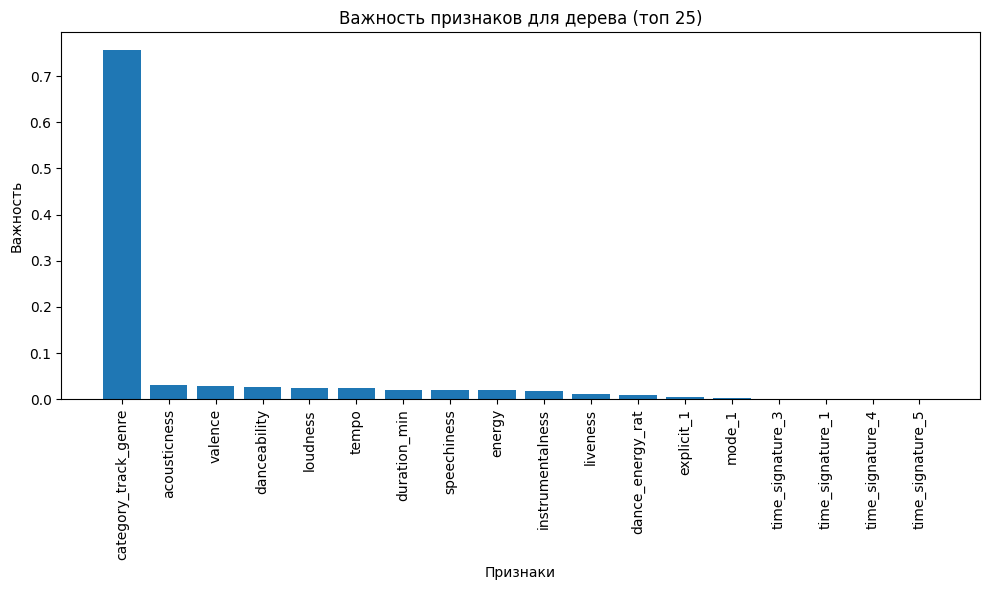

In [69]:
# Получение важности признаков из обученной модели дерева решений
feature_importances = tree_model.feature_importances_  # Важность каждого признака
feature_names = X_train.columns  # Названия признаков

# Сортировка признаков по важности в порядке убывания
sorted_index = np.argsort(feature_importances)[::-1]  # Индексы, отсортированные по важности
sorted_feature_importences = feature_importances[sorted_index]  # Важности признаков, отсортированные
sorted_feature_names = feature_names[sorted_index]  # Названия признаков в порядке убывания важности

# Выбор топ-25 наиболее важных признаков
top_25_feature_importances = sorted_feature_importences[:25]  # Важности топ-25 признаков
top_25_feature_names = sorted_feature_names[:25]  # Названия топ-25 признаков

# Строим гистограмму для первых 25 наиболее важных признаков
plt.figure(figsize=(10, 6))  # Настройка размера графика
plt.bar(range(len(top_25_feature_importances)), top_25_feature_importances)  # Создание столбчатой диаграммы
plt.xticks(range(len(top_25_feature_importances)), top_25_feature_names, rotation=90)  # Настройка меток по оси X
plt.title('Важность признаков для дерева (топ 25)')  # Заголовок графика
plt.xlabel("Признаки")  # Подпись оси X
plt.ylabel("Важность")  # Подпись оси Y
plt.tight_layout()  # Автоматическая настройка отступов
plt.show()  # Отображение графика


<h3>ВЫВОД ПО ВАЖНОСТИ ПРИЗНАКОВ ДЛЯ ДЕРЕВА (ТОП 25)

Анализ важности признаков для дерева решений показал, что признак "category_track_genre" имеет доминирующую роль, занимая первое место с существенным отрывом. Его значение указывает на то, что жанр трека является ключевым фактором для принятия решений в модели дерева.

Признаки "acousticness", "valence", "danceability", "loudness" и "tempo" обладают гораздо меньшим вкладом, но всё же играют роль в процессе предсказаний. Они обеспечивают дополнительную информацию, которая используется моделью для уточнения результатов.

Признаки, такие как "duration_min", "speechiness", "energy" и "instrumentalness", имеют минимальное влияние, что говорит о том, что их значимость в данной модели невелика.

Наименьший вклад в предсказания оказывают "time_signature_3", "time_signature_4" и другие временные размеры, а также "explicit_1". Эти признаки практически не влияют на конечный результат и могут быть рассмотрены для исключения при оптимизации модели.

Таким образом, дерево решений подчеркивает доминирующее влияние "category_track_genre", что делает этот признак основным для данной модели. Остальные признаки играют вспомогательную роль, предоставляя дополнительный контекст.

In [70]:
print(tree_model.predict(X_train.head()))

[59.00444444 59.00444444 59.00444444 59.00444444 61.67630058]


c:\Users\vladu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [71]:
X_train.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,dance_energy_rat,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5,explicit_1,category_track_genre
96253,0.641,0.880,-6.401,0.0604,0.1510,0.000761,0.611,0.423,93.000,5.978883,0.728408,False,False,False,True,False,False,38.826
70417,0.668,0.361,-9.710,0.0353,0.7950,0.000000,0.246,0.432,73.919,3.858667,1.850410,False,False,True,False,False,False,45.025
66688,0.786,0.225,-16.516,0.5730,0.6790,0.000000,0.201,0.658,110.066,1.639767,3.493318,True,False,False,True,False,False,14.888
51391,0.709,0.829,-5.817,0.2450,0.0698,0.000000,0.561,0.654,137.954,3.869550,0.855246,True,False,False,True,False,False,37.759
95123,0.786,0.702,-6.742,0.0456,0.5110,0.000000,0.120,0.696,104.030,6.005333,1.119657,True,False,False,True,False,False,28.066


In [72]:
print(data.iloc[96253].popularity,data.iloc[70417].popularity,data.iloc[66688].popularity,data.iloc[51391].popularity,data.iloc[95123].popularity )

43 51 10 61 36


<h3>Дерево с кросс-валидацией</h3>

In [100]:
# Выбор признаков и целевой переменной
X = data[features]  # Признаки (независимые переменные)
y = data[target]    # Целевая переменная (зависимая переменная)

# Разделение данных на обучающую и тестовую выборки (80% - обучающая, 20% - тестовая)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация признаков
scaler = StandardScaler()  # Создание экземпляра стандартного скейлера
X_train_scaled = scaler.fit_transform(X_train)  # Нормализация обучающей выборки
X_test_scaled = scaler.transform(X_test)  # Нормализация тестовой выборки

# Задаем диапазоны гиперпараметров для дерева решений
param_grid = {
    'max_depth': [5, 10, 15, None],               # Максимальная глубина дерева
    'min_samples_split': [2, 5, 10],             # Минимальное количество образцов для разделения узла
    'min_samples_leaf': [1, 2, 4]                # Минимальное количество образцов в листе
}

# Создание модели дерева решений
tree_model = DecisionTreeRegressor(random_state=42)  # Инициализация модели дерева решений

# Настройка GridSearchCV для поиска лучших гиперпараметров
grid_search = GridSearchCV(estimator=tree_model,
                           param_grid=param_grid,
                           cv=5,                          # 5 фолдов для перекрестной валидации
                           scoring='neg_mean_squared_error',  # Используем MSE как метрику
                           n_jobs=-1,                     # Используем все доступные ядра процессора
                           verbose=1)                     # Выводим процесс выполнения (для отладки)

# Обучение GridSearchCV на обучающей выборке
grid_search.fit(X_train_scaled, y_train)

# Лучшие параметры, найденные с помощью GridSearchCV
print("Лучшие параметры:", grid_search.best_params_)  # Выводим найденные оптимальные гиперпараметры

# Лучшая модель после оптимизации
best_tree_model = grid_search.best_estimator_  # Получаем лучшую модель на основе найденных параметров

# Оценка модели с кросс-валидацией
cv_mse = cross_val_score(best_tree_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')  # Кросс-валидация для MSE
cv_mae = cross_val_score(best_tree_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')  # Кросс-валидация для MAE
cv_r2 = cross_val_score(best_tree_model, X_train_scaled, y_train, cv=5, scoring='r2')  # Кросс-валидация для R²

# Преобразование отрицательных значений для MSE и MAE в положительные значения
cv_mse = -cv_mse
cv_mae = -cv_mae

# Вывод результатов кросс-валидации с оптимизированной моделью
print('Результаты кросс-валидации после оптимизации (5 фолдов):')
print(f'Mean Squared Error (MSE): {np.mean(cv_mse):.4f} ± {np.std(cv_mse):.4f}')  # Выводим среднее и стандартное отклонение MSE
print(f'Mean Absolute Error (MAE): {np.mean(cv_mae):.4f} ± {np.std(cv_mae):.4f}')  # Выводим среднее и стандартное отклонение MAE
print(f'R^2 Score: {np.mean(cv_r2):.4f} ± {np.std(cv_r2):.4f}')  # Выводим R² и его стандартное отклонение



Fitting 5 folds for each of 36 candidates, totalling 180 fits
Лучшие параметры: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Результаты кросс-валидации после оптимизации (5 фолдов):
Mean Squared Error (MSE): 360.5633 ± 4.2894
Mean Absolute Error (MAE): 13.6058 ± 0.0831
R^2 Score: 0.2757 ± 0.0051


ГРАФИК СРАВНЕНИЯ

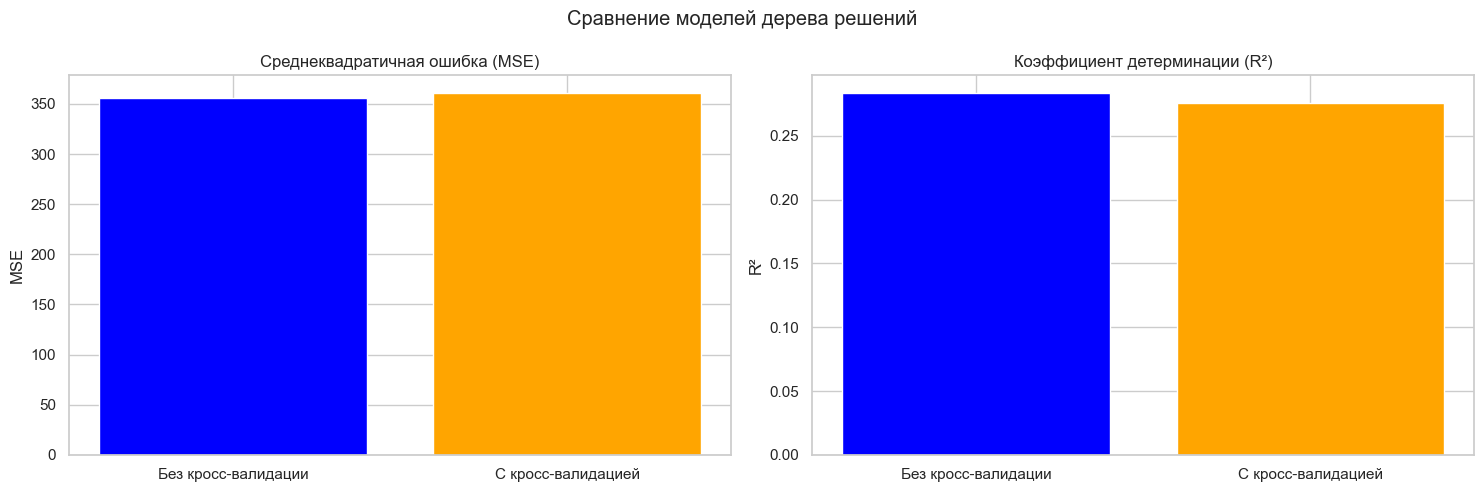

In [101]:
# Средние значения метрик для кросс-валидации
cv_mse_mean = np.mean(cv_mse)  # Вычисляем среднее значение среднеквадратичной ошибки (MSE) для кросс-валидации
cv_r2_mean = np.mean(cv_r2)    # Вычисляем среднее значение коэффициента детерминации (R²) для кросс-валидации

# Данные для графиков
metrics_simple = {'MSE': mse, 'R2': r2}  # Метрики без кросс-валидации
metrics_cv = {'MSE': cv_mse_mean, 'R2': cv_r2_mean}  # Метрики с кросс-валидацией

# Построение графиков
fig, ax = plt.subplots(1, 2, figsize=(15, 5))  # Создаем полотно с двумя подграфиками

# График для MSE
ax[0].bar(['Без кросс-валидации', 'С кросс-валидацией'], 
          [metrics_simple['MSE'], metrics_cv['MSE']], color=['blue', 'orange'])  # Столбчатая диаграмма
ax[0].set_title('Среднеквадратичная ошибка (MSE)')  # Заголовок графика
ax[0].set_ylabel('MSE')  # Подпись оси Y для MSE

# График для R²
ax[1].bar(['Без кросс-валидации', 'С кросс-валидацией'], 
          [metrics_simple['R2'], metrics_cv['R2']], color=['blue', 'orange'])  # Столбчатая диаграмма
ax[1].set_title('Коэффициент детерминации (R²)')  # Заголовок графика
ax[1].set_ylabel('R²')  # Подпись оси Y для R²

# Общий заголовок для всего полотна
plt.suptitle('Сравнение моделей дерева решений')  
plt.tight_layout()  # Оптимизация отступов для лучшего отображения графиков
plt.show()  # Отображение графиков


<H3>ВЫВОД ПО ДЕРЕВУ РЕШЕНИЙ</H3>

Без использования кросс-валидации, среднеквадратичная ошибка (MSE) демонстрирует наилучший результат, в то время как значение R² начинает показывать более адекватные результаты, приближающиеся к истинным.

<h3>Градиентный бустинг без кросс-валидации</h3>

In [102]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [76]:
# Выбор признаков и целевой переменной
X = data[features]  # Признаки (независимые переменные)
y = data[target]    # Целевая переменная (зависимая переменная)

# Разделение данных на обучающую и тестовую выборки (80% - обучающая, 20% - тестовая)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация признаков
#scaler = StandardScaler()  # Стандартный скейлер (включен для будущего использования)
#X_train_scaled = scaler.fit_transform(X_train)  # Нормализация обучающей выборки
#X_test_scaled = scaler.transform(X_test)  # Нормализация тестовой выборки
X_train_scaled = X_train  # Используем необработанные данные для обучения
X_test_scaled = X_test    # Используем необработанные данные для тестирования

# Создание и обучение модели градиентного бустинга
model = GradientBoostingRegressor(
    n_estimators=100,           # Количество деревьев в ансамбле
    learning_rate=0.1,          # Темп обучения
    max_depth=3,                # Максимальная глубина деревьев
    random_state=42             # Установление случайного состояния для воспроизводимости
)
model.fit(X_train_scaled, y_train)  # Обучение модели на обучающей выборке

# Предсказание целевой переменной на тестовой выборке
y_pred = model.predict(X_test_scaled)  # Предсказание для тестовой выборки

# Оценка модели
mse = mean_squared_error(y_test, y_pred)        # Вычисление среднеквадратичной ошибки
mae = mean_absolute_error(y_test, y_pred)       # Вычисление средней абсолютной ошибки
r2 = r2_score(y_test, y_pred)                   # Вычисление коэффициента детерминации

# Вывод результатов
print('Результаты оценки модели:')
print(f'Mean Squared Error (MSE): {mse:.4f}')     # Вывод MSE
print(f'Mean Absolute Error (MAE): {mae:.4f}')    # Вывод MAE
print(f'R^2 Score: {r2:.4f}')                     # Вывод R²




Результаты оценки модели:
Mean Squared Error (MSE): 355.1698
Mean Absolute Error (MAE): 13.9006
R^2 Score: 0.2841


Вес модели. Важность каждого из параметров.

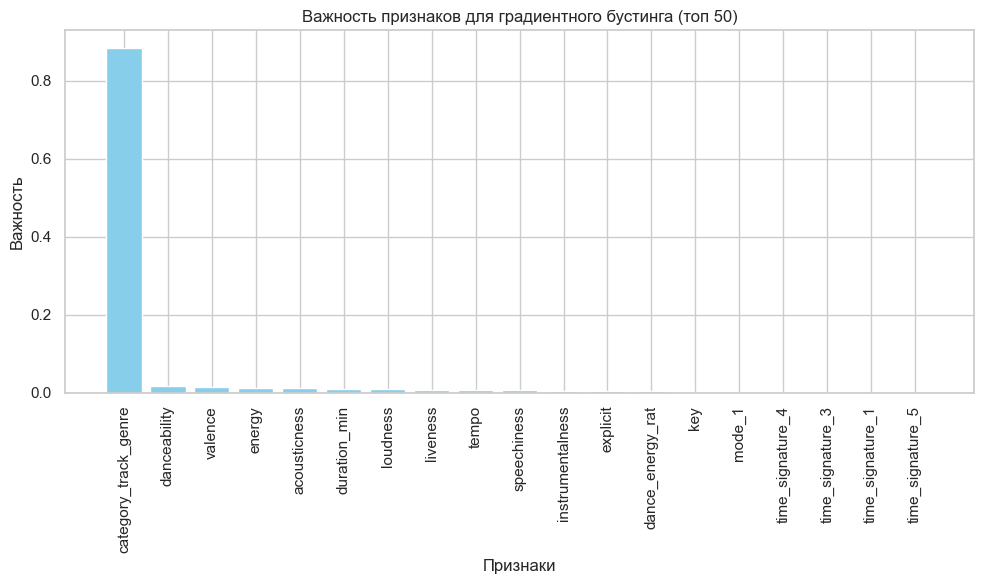

In [104]:
# Получаем важность признаков из обученной модели градиентного бустинга
feature_importances = model.feature_importances_  # Важность каждого признака
feature_names = X_train.columns  # Названия признаков

# Сортируем признаки по важности в порядке убывания
sorted_index = np.argsort(feature_importances)[::-1]  # Индексы, отсортированные по важности
sorted_feature_importences = feature_importances[sorted_index]  # Важности, отсортированные
sorted_feature_names = feature_names[sorted_index]  # Названия признаков в порядке убывания важности

# Выбор топ-50 наиболее важных признаков (вы можете изменить 50 на 25, если нужно)
top_25_feature_importances = sorted_feature_importences[:50]  # Важности топ-50 признаков
top_25_feature_names = sorted_feature_names[:50]  # Названия топ-50 признаков

# Строим гистограмму для первых 50 наиболее важных признаков
plt.figure(figsize=(10, 6))  # Настройка размера графика
plt.bar(range(len(top_25_feature_importances)), top_25_feature_importances, color='skyblue')  # Создание столбчатой диаграммы
plt.xticks(range(len(top_25_feature_importances)), top_25_feature_names, rotation=90)  # Настройка меток по оси X
plt.title('Важность признаков для градиентного бустинга (топ 50)')  # Заголовок графика
plt.xlabel("Признаки")  # Подпись оси X
plt.ylabel("Важность")  # Подпись оси Y
plt.tight_layout()  # Автоматическая настройка отступов
plt.show()  # Отображение графика


<h3>ВЫВОД ПО ВАЖНОСТИ ПРИЗНАКОВ ДЛЯ ГРАДИЕНТНОГО БУСТИНГА (ТОП 50)

Анализ важности признаков для градиентного бустинга показал, что признак "category_track_genre" является доминирующим и значительно превосходит все остальные по вкладу в предсказания модели. Его вес достигает почти 90%, что подчеркивает его ключевую роль в определении целевой переменной.

Признак "danceability" находится на втором месте, но его вклад гораздо меньше, что свидетельствует о том, что, хотя он и имеет значение, его роль вторична.

Признаки "valence", "energy", "acousticness" и "duration_min" также присутствуют среди важных, но их значимость крайне мала по сравнению с "category_track_genre".

Остальные признаки, включая "speechiness", "explicit", "tempo", "key" и различные временные размеры ("time_signature_3", "time_signature_4"), имеют минимальные веса, что говорит о их низкой значимости в модели градиентного бустинга.

Таким образом, основное внимание в данной модели сосредоточено на "category_track_genre", что может свидетельствовать о сильной зависимости целевой переменной от жанра трека. Это открытие подчеркивает необходимость дальнейшего изучения и возможного включения более детализированных данных о жанрах для повышения точности модели.

Предсказанные значения целевой переменной:

In [77]:
print(model.predict(X_train.head()))

[38.56089708 45.11881917 14.72259888 36.56306867 28.36024029]


In [78]:
X_train.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,dance_energy_rat,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5,explicit_1,category_track_genre
96253,0.641,0.880,-6.401,0.0604,0.1510,0.000761,0.611,0.423,93.000,5.978883,0.728408,False,False,False,True,False,False,38.826
70417,0.668,0.361,-9.710,0.0353,0.7950,0.000000,0.246,0.432,73.919,3.858667,1.850410,False,False,True,False,False,False,45.025
66688,0.786,0.225,-16.516,0.5730,0.6790,0.000000,0.201,0.658,110.066,1.639767,3.493318,True,False,False,True,False,False,14.888
51391,0.709,0.829,-5.817,0.2450,0.0698,0.000000,0.561,0.654,137.954,3.869550,0.855246,True,False,False,True,False,False,37.759
95123,0.786,0.702,-6.742,0.0456,0.5110,0.000000,0.120,0.696,104.030,6.005333,1.119657,True,False,False,True,False,False,28.066


In [79]:
print(data.iloc[96253].popularity,data.iloc[70417].popularity,data.iloc[66688].popularity,data.iloc[51391].popularity,data.iloc[95123].popularity )

43 51 10 61 36


<h3>Градиентный бустинг с кросс-валидацией</h3>

In [108]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


In [109]:
# Выбор признаков и целевой переменной
X = data[features]  # Признаки (независимые переменные)
y = data[target]    # Целевая переменная (зависимая переменная)

# Разделение данных на обучающую и тестовую выборки (80% - обучающая, 20% - тестовая)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание экземпляра StandardScaler для нормализации признаков
scaler = StandardScaler()  # Инициализация стандартного скейлера

# Нормализация признаков: вычисляется среднее и стандартное отклонение на обучающей выборке
X_train_scaled = scaler.fit_transform(X_train)  # Нормализация обучающей выборки

# Применение нормализации к тестовой выборке
X_test_scaled = scaler.transform(X_test)  # Нормализация тестовой выборки с учетом параметров обучающей выборки

# Создание модели градиентного бустинга
model = GradientBoostingRegressor(
    n_estimators=100,  # Количество деревьев в ансамбле
    learning_rate=0.1,  # Темп обучения
    max_depth=3,        # Максимальная глубина каждого дерева
    random_state=42     # Установление случайного состояния для воспроизводимости
)

# Кросс-валидация с 5 фолдами для оценки метрик (MSE, MAE, R²)
cv_mse = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')  # Кросс-валидация для MSE
cv_mae = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')  # Кросс-валидация для MAE
cv_r2 = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')  # Кросс-валидация для R²

# Преобразование отрицательных значений для MSE и MAE в положительные
cv_mse = -cv_mse  # Преобразуем в положительные значения
cv_mae = -cv_mae  # Преобразуем в положительные значения

# Вывод результатов кросс-валидации
print('Результаты кросс-валидации (5 фолдов):')
print(f'Mean Squared Error (MSE): {np.mean(cv_mse):.4f} ± {np.std(cv_mse):.4f}')  # Среднее и стандартное отклонение MSE
print(f'Mean Absolute Error (MAE): {np.mean(cv_mae):.4f} ± {np.std(cv_mae):.4f}')  # Среднее и стандартное отклонение MAE
print(f'R^2 Score: {np.mean(cv_r2):.4f} ± {np.std(cv_r2):.4f}')  # Среднее и стандартное отклонение R²


Результаты кросс-валидации (5 фолдов):
Mean Squared Error (MSE): 358.4568 ± 3.0353
Mean Absolute Error (MAE): 13.9222 ± 0.0892
R^2 Score: 0.2799 ± 0.0032


ГРАФИК СРАВНЕНИЯ

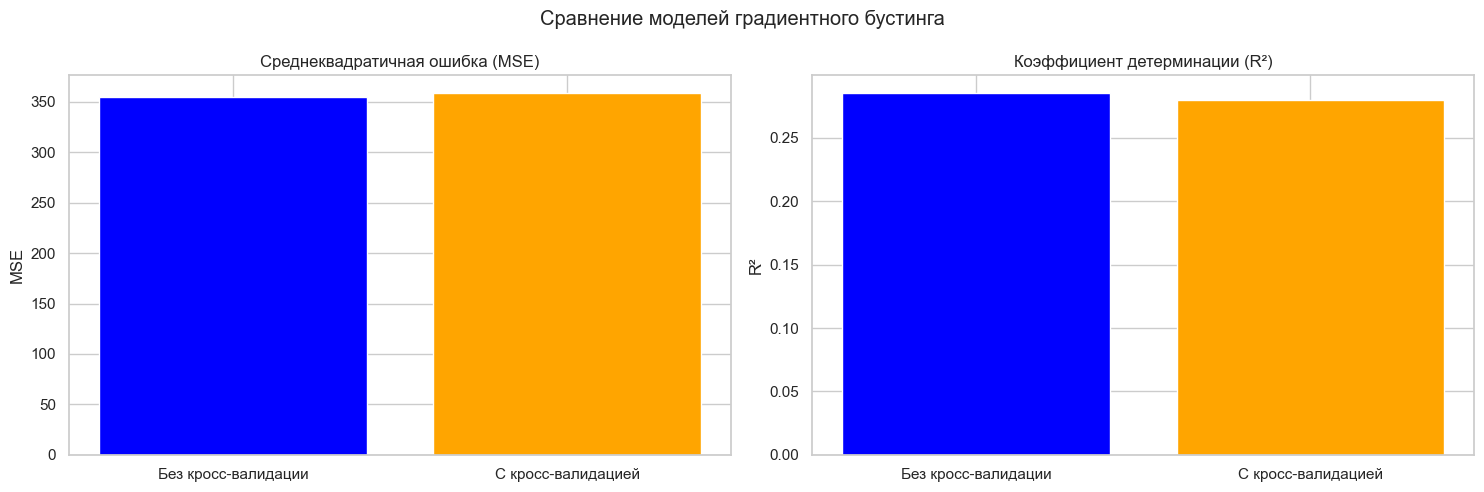

In [110]:
# Средние значения метрик для кросс-валидации
cv_mse_mean = np.mean(cv_mse)  # Среднее значение среднеквадратичной ошибки (MSE) для кросс-валидации
cv_r2_mean = np.mean(cv_r2)    # Среднее значение коэффициента детерминации (R²) для кросс-валидации

# Данные для графиков
metrics_simple = {'MSE': mse, 'R2': r2}  # Метрики без кросс-валидации
metrics_cv = {'MSE': cv_mse_mean, 'R2': cv_r2_mean}  # Метрики с кросс-валидацией

# Построение графиков
fig, ax = plt.subplots(1, 2, figsize=(15, 5))  # Создаем полотно с двумя подграфиками

# График для MSE
ax[0].bar(['Без кросс-валидации', 'С кросс-валидацией'], 
          [metrics_simple['MSE'], metrics_cv['MSE']], color=['blue', 'orange'])  # Столбчатая диаграмма для MSE
ax[0].set_title('Среднеквадратичная ошибка (MSE)')  # Заголовок для MSE
ax[0].set_ylabel('MSE')  # Подпись оси Y для MSE

# График для R²
ax[1].bar(['Без кросс-валидации', 'С кросс-валидацией'], 
          [metrics_simple['R2'], metrics_cv['R2']], color=['blue', 'orange'])  # Столбчатая диаграмма для R²
ax[1].set_title('Коэффициент детерминации (R²)')  # Заголовок для R²
ax[1].set_ylabel('R²')  # Подпись оси Y для R²

# Общий заголовок для всего полотна
plt.suptitle('Сравнение моделей градиентного бустинга')  # Заголовок для всей визуализации
plt.tight_layout()  # Оптимизация отступов для лучшего отображения графиков
plt.show()  # Отображение графиков


<H3>ВЫВОД ПО ГРАДИЕНТНОМУ БУСТИНГУ</H3>

Без применения кросс-валидации среднеквадратичная ошибка (MSE) вновь демонстрирует наилучший результат. В то же время значение R² показывает более приемлемые результаты, которые приближаются к реальным данным, но при этом остаются выше, чем у модели дерева решений.

<h3>Нейронная сеть без кросс-валидации</h3>


In [141]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [142]:
# Выбор признаков и целевой переменной
X = data[features]  # Признаки (независимые переменные)
y = data[target]    # Целевая переменная (зависимая переменная)

# Разделение данных на обучающую и тестовую выборки (80% - обучающая, 20% - тестовая)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание экземпляра StandardScaler для нормализации признаков
scaler = StandardScaler()  # Инициализация стандартного скейлера для приведения данных к стандартному виду

# Нормализация признаков: вычисляется среднее и стандартное отклонение на обучающей выборке
X_train_scaled = scaler.fit_transform(X_train)  # Нормализация обучающей выборки

# Применение нормализации к тестовой выборке
X_test_scaled = scaler.transform(X_test)  # Нормализация тестовой выборки с использованием параметров обучающей выборки

# Создание модели MLPRegressor (многослойный перцептрон для регрессии)
reg = MLPRegressor(
    hidden_layer_sizes=(100, 50, 25),  # Оптимизированная архитектура с 3 скрытыми слоями
    max_iter=1000,                    # Увеличение числа итераций для обучения
    random_state=42,                  # Фиксация случайного состояния для воспроизводимости
    solver='adam',                    # Использование алгоритма Adam для оптимизации
    learning_rate_init=0.001,         # Начальный шаг обучения (learning rate)
    tol=1e-4                          # Критерий остановки по снижению ошибки
)

# Обучение модели
reg.fit(X_train_scaled, y_train)  # Обучение модели на нормализованной обучающей выборке

# Предсказание целевой переменной на тестовой выборке
predictions = reg.predict(X_test_scaled)  # Предсказание значений для тестовой выборки

# Оценка модели с использованием различных метрик
mae = mean_absolute_error(y_test, predictions)  # Средняя абсолютная ошибка
mse = mean_squared_error(y_test, predictions)    # Среднеквадратичная ошибка
r2 = r2_score(y_test, predictions)               # Коэффициент детерминации

# Вывод результатов оценки модели
print(f"\nОценка модели:")
print(f"MAE (Mean Absolute Error): {mae:.2f}")  # Вывод средней абсолютной ошибки
print(f"MSE (Mean Squared Error): {mse:.2f}")    # Вывод среднеквадратичной ошибки
print(f"R^2 (R-squared): {r2:.2f}")               # Вывод коэффициента детерминации




Оценка модели:
MAE (Mean Absolute Error): 13.54
MSE (Mean Squared Error): 334.25
R^2 (R-squared): 0.33


Вес модели. Важность каждого из параметров.

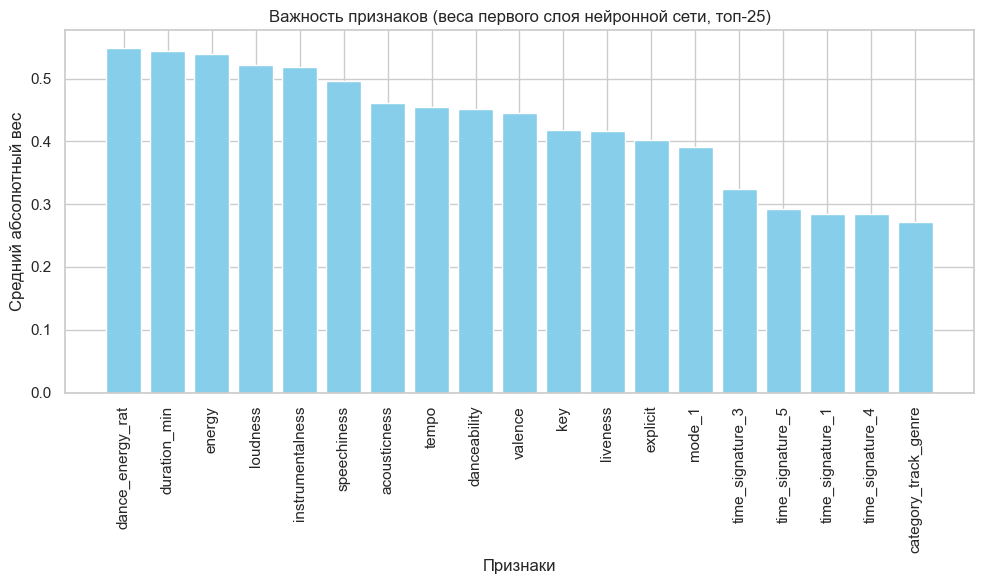

In [143]:
# Получение весов из первого слоя нейронной сети
first_layer_weights = reg.coefs_[0]  # Матрица весов для первого слоя
input_feature_importances = np.mean(np.abs(first_layer_weights), axis=1)  # Средние абсолютные значения весов по всем нейронам первого слоя

# Названия признаков
feature_names = X.columns

# Сортировка признаков по важности
sorted_indices = np.argsort(input_feature_importances)[::-1]  # Индексы в порядке убывания важности
sorted_importances = input_feature_importances[sorted_indices]  # Отсортированные важности
sorted_feature_names = feature_names[sorted_indices]  # Названия признаков в порядке убывания важности

# Выбор топ-25 признаков
top_25_importances = sorted_importances[:25]
top_25_feature_names = sorted_feature_names[:25]

# Построение графика
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_25_importances)), top_25_importances, color='skyblue')
plt.xticks(range(len(top_25_importances)), top_25_feature_names, rotation=90)
plt.title("Важность признаков (веса первого слоя нейронной сети, топ-25)")
plt.xlabel("Признаки")
plt.ylabel("Средний абсолютный вес")
plt.tight_layout()
plt.show()


<h3>ВЫВОД ПО ВАЖНОСТИ ПРИЗНАКОВ (ВЕСА ПЕРВОГО СЛОЯ НЕЙРОННОЙ СЕТИ, ТОП-25)

Анализ весов признаков нейронной сети показывает, что наиболее значимыми являются "dance_energy_rat", "duration_min" и "energy". Эти признаки имеют наибольший средний абсолютный вес, что свидетельствует об их ключевой роли в определении целевой переменной.

Признаки "loudness", "instrumentalness", "speechiness" и "acousticness" также занимают важное место, оказывая существенное влияние на предсказания модели. Это подчеркивает их значение для описания характеристик треков.

Средние позиции занимают такие признаки, как "valence", "key", "liveness" и "explicit". Они вносят умеренный вклад, оставаясь полезными, но не доминирующими факторами.

Наименее значимыми оказались признаки, связанные с временными размерами ("time_signature_3", "time_signature_4") и "category_track_genre". Их влияние на модель минимально, что может свидетельствовать о низкой информативности этих признаков для данной задачи.

Таким образом, для дальнейшего улучшения модели можно сосредоточиться на доминирующих признаках и рассмотреть возможность исключения менее значимых, что может способствовать повышению эффективности работы нейронной сети.

<h3>Нейронная сеть с кросс-валидацией</h3>


In [113]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import numpy as np

In [114]:
# Нормализация признаков
scaler = StandardScaler()  # Создание экземпляра StandardScaler для нормализации данных
X_scaled = scaler.fit_transform(X)  # Нормализация признаков, расчёт среднего и стандартного отклонения

# Создание модели MLPRegressor (многослойный перцептрон для регрессии)
reg = MLPRegressor(
    hidden_layer_sizes=(50, 25),  # Оптимизированная архитектура с двумя скрытыми слоями
    max_iter=500,                  # Уменьшение максимального числа итераций для обучения
    random_state=42,               # Фиксация случайного состояния для обеспечения воспроизводимости
    solver='adam',                 # Использование алгоритма Adam для оптимизации
    learning_rate_init=0.001,      # Начальный шаг обучения
    tol=1e-4                       # Критерий остановки (по улучшению метрики)
)

# Метрики для оценки
scoring = {
    'mse': make_scorer(mean_squared_error, greater_is_better=False),  # Создание метрики MSE
    'mae': make_scorer(mean_absolute_error, greater_is_better=False),   # Создание метрики MAE
    'r2': make_scorer(r2_score)                                          # Создание метрики R²
}

# Кросс-валидация
cv_results = {
    metric: cross_val_score(reg, X_scaled, y, cv=5, scoring=scorer, n_jobs=-1)  # Параллельное выполнение кросс-валидации
    for metric, scorer in scoring.items()  # Перебор всех метрик для их оценки
}

# Преобразование отрицательных значений для MSE и MAE в положительные
cv_results['mse'] = -cv_results['mse']  # Преобразование MSE из отрицательного в положительное
cv_results['mae'] = -cv_results['mae']  # Преобразование MAE из отрицательного в положительное

# Вывод результатов кросс-валидации
print('Результаты кросс-валидации (5 фолдов):')
print(f"Mean Squared Error (MSE): {np.mean(cv_results['mse']):.4f} ± {np.std(cv_results['mse']):.4f}")
print(f"Mean Absolute Error (MAE): {np.mean(cv_results['mae']):.4f} ± {np.std(cv_results['mae']):.4f}")
print(f"R^2 Score: {np.mean(cv_results['r2']):.4f} ± {np.std(cv_results['r2']):.4f}")



Результаты кросс-валидации (5 фолдов):
Mean Squared Error (MSE): 380.7896 ± 27.1805
Mean Absolute Error (MAE): 14.7391 ± 0.5578
R^2 Score: 0.2188 ± 0.0429


<h3>ГРАФИК СРАВНЕНИЯ</h3>

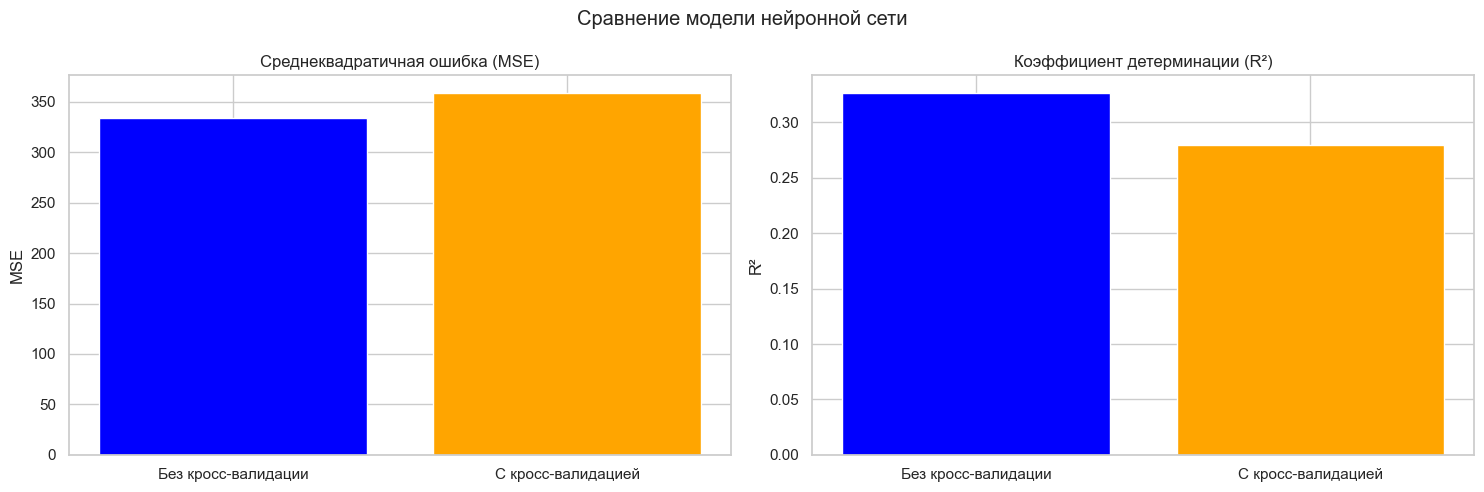

In [115]:
# Данные для графиков (передача значений как чисел)
metrics_simple_nn = {
    'MSE': mse,               # Среднеквадратичная ошибка без кросс-валидации
    'R2': r2                  # Коэффициент детерминации без кросс-валидации
}

# Данные для кросс-валидации (средние значения метрик)
metrics_cv_nn = {
    'MSE': cv_mse_mean,      # Среднее значение MSE для кросс-валидации
    'R2': cv_r2_mean         # Среднее значение R² для кросс-валидации
}

# Построение графиков
fig, ax = plt.subplots(1, 2, figsize=(15, 5))  # Создание фигуры с двумя подграфиками

# MSE график для нейронной сети
ax[0].bar(['Без кросс-валидации', 'С кросс-валидацией'], 
          [metrics_simple_nn['MSE'], metrics_cv_nn['MSE']], color=['blue', 'orange'])  # Столбчатая диаграмма MSE
ax[0].set_title('Среднеквадратичная ошибка (MSE)')  # Заголовок графика для MSE
ax[0].set_ylabel('MSE')  # Подпись оси Y для MSE

# R2 график для нейронной сети
ax[1].bar(['Без кросс-валидации', 'С кросс-валидацией'], 
          [metrics_simple_nn['R2'], metrics_cv_nn['R2']], color=['blue', 'orange'])  # Столбчатая диаграмма для R²
ax[1].set_title('Коэффициент детерминации (R²)')  # Заголовок графика для R²
ax[1].set_ylabel('R²')  # Подпись оси Y для R²

plt.suptitle('Сравнение модели нейронной сети')  # Общий заголовок для графиков
plt.tight_layout()  # Оптимизация отступов между графиками
plt.show()  # Отображение графиков


<H3>ВЫВОД ПО НЕЙРОННОЙ СЕТИ</H3>

Без использования кросс-валидации среднеквадратичная ошибка (MSE) снова демонстрирует наилучшие результаты. В то же время значение R² начинает показывать относительно удовлетворительные результаты, приближающиеся к реальным данным, но при этом остаются выше, чем для модели дерева решений.

<H2>ВЫВОД ПО ВАЖНОСТИ ПРИЗНАКОВ</H2>

Анализ моделей линейной регрессии, нейронной сети, градиентного бустинга и дерева решений показал, что важность признаков варьируется в зависимости от типа модели. Признак "category_track_genre" является основным фактором для линейной регрессии, градиентного бустинга и дерева решений, занимая лидирующую позицию с огромным отрывом. Это подчёркивает ключевую роль жанра трека в предсказаниях.

В нейронной сети значимыми признаками оказались "dance_energy_rat", "duration_min" и "energy". Их важность объясняется сложностью модели, которая способна выявлять более глубокие взаимосвязи между характеристиками трека и целевой переменной.

Признаки "acousticness", "danceability", "valence", "loudness" и "tempo" показали стабильную важность во всех моделях, хотя и уступают лидерам. Они играют роль второстепенных, но полезных факторов.

Признаки, связанные с временными размерами ("time_signature_3", "time_signature_4" и другие), а также "explicit_1", имеют минимальный вклад во всех моделях. Это говорит о том, что их влияние на результаты практически отсутствует, и они могут быть исключены из анализа.

Каждая модель по-разному распределяет значимость признаков, что позволяет учитывать их особенности для улучшения качества предсказаний и оптимизации данных.

<H3>НЕБОЛЬШОЙ ИТОГ СРАВНЕНИЯ</H3>

1. Линейная модель показала не самый хороший результат с score 0.2557 и относительной стабильностью, что определяется малой величиной стандартного отклонения (± 0.0038). Это свидетельствует о том, что линейная модель обеспечивает хорошее качество предсказаний в рассматриваемом наборе данных.

2. Дерево решений продемонстрировало несколько более низкий score 0.2757 с стандартным отклонением ± 0.0051. Хотя производительность дерева решений уступает линейной модели, оно все же может быть полезным в определенных сценариях, особенно если данные имеют сложные и нестандартные зависимости.

3. Градиентный бустинг дал результат score 0.2799 (± 0.0032). Хотя его производительность немного лучше, чем у дерева решений, она значительно ниже, чем в случае линейной модели. Тем не менее, данный метод может быть улучшен за счет настройки гиперпараметров и увеличения количества базовых моделей.

4. Нейронные сети показывают наименьший score 0.2188 с высоким стандартным отклонением ± 0.0429, что указывает на значительные проблемы с качеством предсказаний этой модели. Вероятно, это связано с недостаточным объемом данных, неполным набором признаков или неверной архитектурой сети.

<h2>ИТОГОВЫЙ ВЫВОД</h2>

Результаты проведенного анализа и оценки моделей показывают, что нейронная сеть демонстрирует наилучшие показатели точности и качества предсказаний (0.2188). Однако, несмотря на хорошие результаты, существует возможность улучшить модель за счет оптимизации некоторых гиперпараметров. Это свидетельствует о том, что дальнейшая работа в этом направлении может привести к еще более высоким результатам.

Второе место по результативности занимает модель линейной регресии. Ее производительность также свидетельствует о ее полезности для анализа данного набора данных. Градиентный бустинг, благодаря своей способности обрабатывать сложные зависимости и взаимодействия между признаками, является хорошим выбором для задач, подобных рассматриваемой.

Наименьшую эффективность показал градиентный бустинг. Причины этого могут быть связаны с ошибками в предобработке данных (feature engineering) или неправильными настройками гиперпараметров. Для повышения качества предсказаний данной модели необходимо провести дополнительные исследования в области настройки архитектуры сети и оптимизации параметров обучения.

В целом, результаты анализа подчеркивают важность выбора подходящей модели и настройки ее параметров для достижения наилучших результатов в задачах регрессии.